In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 29.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import imblearn
import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score

!pip install category_encoders

from category_encoders import TargetEncoder


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/work/Cleveland'

In [ ]:
import os

def find_csv_files(folder_path):
    """Recursively find all files with .csv extension in the directory and its subdirectories."""
    csv_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def load_and_merge_csv_files(csv_files):
    dataframes = []
    for file in csv_files:
        try:

            df = pd.read_csv(file)
            dataframes.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")
    if dataframes:
        merged_df = pd.concat(dataframes, ignore_index=True)
        return merged_df
    else:
        return pd.DataFrame()



csv_files = find_csv_files(folder_path)
if csv_files:
    merged_df = load_and_merge_csv_files(csv_files)

    merged_df.to_csv('/content/drive/My Drive/work/Cleveland.csv', index=False)
    print("All CSV files have been merged successfully.")
else:
    print("No CSV files found in the specified directory.")


All CSV files have been merged successfully.


In [ ]:
file_path = '/content/drive/My Drive/work/Cleveland.csv'
cle = pd.read_csv(file_path)

In [ ]:
cle.head(30)

Crime ID    Month  \
0   da500f0deaac601b70dc80d2370a115453c7ba6e466356...  2024-04   
1                                                 NaN  2024-04   
2                                                 NaN  2024-04   
3                                                 NaN  2024-04   
4                                                 NaN  2024-04   
5   80291630e8f21fd51691703285ddb7538c31c8ec5ed33a...  2024-04   
6   b821595e6541ee34ab533a2f8a13db2d60f1753e4c1d25...  2024-04   
7   63a7ad877c0010586e06312ddc95ae080a27a519c142a3...  2024-04   
8   98af8376d324474d531556b695c991d26c8a9cb2011166...  2024-04   
9   f24070102b408e25ac9cdd604f2145b2ba9ecdb3e1a85c...  2024-04   
10  da9eecbafeff3b6df3f68b284743d9f5da6422e89f9542...  2024-04   
11  de38e5f403cb8692f2f9cbf46c264df33de745ba8bdf28...  2024-04   
12  232069765856d9494695026c6810f686285b9731dfd636...  2024-04   
13  82ca01af51f7181433bd02615a76ff4032608dbd0e0040...  2024-04   
14  0d3fe8ebed1eae4d7e6a6d641a96ae66439b63e5e03dd0...  2024-04   
15  e10793d329f66419db4ac13fbd590164205794bd4936b1...  2024-04   
16  b80d400d21d415d7782d964e04fa279b11b7ee88d86ee2...  2024-04   
17  90cbd45143e21d3afdc420b47cc6bccd978054ee8d20e9...  2024-04   
18  aff84dcdae4d966db533468677d38d00e10bfd14bb887d...  2024-04   
19  c45d908b2ee4bd422013f19a40505a6990a71dbd1ff922...  2024-04   
20  d19ef4ac5d38bbb4b203c6acc7dd92470c134b80a9a15c...  2024-04   
21  1f5d2a20d22c5c36f12939a6fbd9cd8b16b1578043f1d8...  2024-04   
22  aae042a55ad8ea83f834a9e3b16f7155bea642dcdc4b5d...  2024-04   
23  7015239fb22e24d07c149ae11fdde99ce3a666d938005b...  2024-04   
24  83197455de4dc26a7a6f223612b49ff557c5e42b717df3...  2024-04   
25  b71595ce9d4a3071e9dbdf64e8750c9d474455d3d975b3...  2024-04   
26  6d63d27421a73e3680f32c3ef24ac0f13273708bc60127...  2024-04   
27  2813bc309dafc0c7b7361684e06d1ee00100c4af5acb44...  2024-04   
28  daed7deaed59d27dfc702412cee0e466b319c19e3c5f65...  2024-04   
29  86f8a5ff7d1dec603187674af7f4bf8277c71b7b8530b3...  2024-04   

         Reported by      Falls within  Longitude   Latitude  \
0   Cleveland Police  Cleveland Police  -1.311583  54.472215   
1   Cleveland Police  Cleveland Police  -1.237144  54.712495   
2   Cleveland Police  Cleveland Police  -1.235660  54.710526   
3   Cleveland Police  Cleveland Police  -1.238644  54.709485   
4   Cleveland Police  Cleveland Police  -1.239865  54.710589   
5   Cleveland Police  Cleveland Police  -1.233080  54.711508   
6   Cleveland Police  Cleveland Police  -1.237805  54.711196   
7   Cleveland Police  Cleveland Police  -1.238644  54.709485   
8   Cleveland Police  Cleveland Police  -1.238522  54.713519   
9   Cleveland Police  Cleveland Police  -1.235660  54.710526   
10  Cleveland Police  Cleveland Police  -1.238771  54.710986   
11  Cleveland Police  Cleveland Police  -1.237805  54.711196   
12  Cleveland Police  Cleveland Police  -1.233941  54.711980   
13  Cleveland Police  Cleveland Police  -1.239865  54.710589   
14  Cleveland Police  Cleveland Police  -1.240964  54.712393   
15  Cleveland Police  Cleveland Police  -1.239498  54.711980   
16  Cleveland Police  Cleveland Police  -1.232855  54.711947   
17  Cleveland Police  Cleveland Police  -1.240964  54.712393   
18  Cleveland Police  Cleveland Police  -1.232855  54.711947   
19  Cleveland Police  Cleveland Police  -1.238214  54.712574   
20  Cleveland Police  Cleveland Police  -1.240964  54.712393   
21  Cleveland Police  Cleveland Police  -1.238771  54.710986   
22  Cleveland Police  Cleveland Police  -1.241913  54.713945   
23  Cleveland Police  Cleveland Police  -1.239972  54.714822   
24  Cleveland Police  Cleveland Police  -1.239972  54.714822   
25  Cleveland Police  Cleveland Police  -1.239972  54.714822   
26  Cleveland Police  Cleveland Police  -1.243998  54.714551   
27  Cleveland Police  Cleveland Police  -1.250039  54.712692   
28  Cleveland Police  Cleveland Police  -1.243998  54.714551   
29  Cleveland Police  Cleveland Police  -1.246412  54.714952   

             

In [ ]:
cle.tail(30)

Crime ID    Month  \
291048  983a58eaa5d749389023b214b0fedfaa8715b84a62c4af...  2021-10   
291049  172c5f87bbaf6b7d45ac5e98c50a3ed964bb2f717df352...  2021-10   
291050  e65ffab5685edc06c230093ea64c55885a3139ba2dafae...  2021-10   
291051  9e03116312d2cc0b5db1b6f76ceaed1ba04f63962567ba...  2021-10   
291052  d76a1b2ec57048ae1cc8a882a48a053020ccb02c04c80c...  2021-10   
291053  74ae090b3945e046e26641338ae0648881b355616206a0...  2021-10   
291054  5db5b2dfdda14dbe8f26bd0ded1bc54a848f124cd7ec1f...  2021-10   
291055  28c4dc588651fad741edfe76c6d8320494670659c5159c...  2021-10   
291056  f273d653cf706295310afebab791283a4e9c590c6787f6...  2021-10   
291057                                                NaN  2021-10   
291058  9b951b0c159cc5947c49d4e8609772565a03cc9e8bef27...  2021-10   
291059  455e05545076482c83a87bb9cc9e075984300b93ba1eed...  2021-10   
291060  90c0c1d027360647d225c1e6431b2b015bc0ce06f0b12d...  2021-10   
291061                                                NaN  2021-10   
291062                                                NaN  2021-10   
291063                                                NaN  2021-10   
291064                                                NaN  2021-10   
291065  1e3480fe0ce77fe0aa07c4be00cae87fcb881df17b6816...  2021-10   
291066  a73749689bd294075af8ba8ed7cf23c5b09d1f784b6406...  2021-10   
291067  08073100df397a27657330bb2ad92b632f734212b02911...  2021-10   
291068  4964a6cf5030a5efa4a2ef8bb0c1160b0bea489cb00319...  2021-10   
291069  6678ce7e70e7a5c3315645c338ea00c6f80f9c7df6588f...  2021-10   
291070                                                NaN  2021-10   
291071                                                NaN  2021-10   
291072                                                NaN  2021-10   
291073                                                NaN  2021-10   
291074  8a9d4f5607edd8a05da45fd936d3ebed56a76019833646...  2021-10   
291075  1d255345048eb0b9c0dd9a380402fd0d3f3c0131578be3...  2021-10   
291076  5b818b7c5d089f19ac613013196de7283373c52eeaa3ec...  2021-10   
291077  cdfb589b2c8890f16439053db416124cab2d3aec8ec6e5...  2021-10   

             Reported by      Falls within  Longitude   Latitude  \
291048  Cleveland Police  Cleveland Police  -1.361934  54.498932   
291049  Cleveland Police  Cleveland Police  -1.361934  54.498932   
291050  Cleveland Police  Cleveland Police  -1.361934  54.498932   
291051  Cleveland Police  Cleveland Police  -1.361934  54.498932   
291052  Cleveland Police  Cleveland Police  -1.359056  54.501307   
291053  Cleveland Police  Cleveland Police  -1.356852  54.501035   
291054  Cleveland Police  Cleveland Police  -1.359548  54.499467   
291055  Cleveland Police  Cleveland Police  -1.359056  54.501307   
291056  Cleveland Police  Cleveland Police  -1.357017  54.504316   
291057  Cleveland Police  Cleveland Police  -1.328549  54.503775   
291058  Cleveland Police  Cleveland Police  -1.332211  54.502680   
291059  Cleveland Police  Cleveland Police  -1.333991  54.500524   
291060  Cleveland Police  Cleveland Police  -1.328815  54.505484   
291061  Cleveland Police  Cleveland Police  -1.353937  54.494944   
291062  Cleveland Police  Cleveland Police  -1.352084  54.497873   
291063  Cleveland Police  Cleveland Police  -1.348137  54.499496   
291064  Cleveland Police  Cleveland Police  -1.349347  54.499143   
291065  Cleveland Police  Cleveland Police  -1.354277  54.493957   
291066  Cleveland Police  Cleveland Police  -1.352932  54.495028   
291067  Cleveland Police  Cleveland Police  -1.344772  54.496485   
291068  Cleveland Police  Cleveland Police  -1.352932  54.495028   
291069  Cleveland Police  Cleveland Police  -1.352932  54.495028   
291070  Cleveland Police  Cleveland Police  -1.358813  54.497127   
291071  Cleveland Police  Cleveland Police  -1.359756  54.493069   
291072  Cleveland Police  Cleveland Police  -1.360221  54.495894   
291073  Cleveland Police  Cleveland Police  -1.362326  54.494602   
291074  Cleveland Police  Cleveland Police

In [ ]:
cle.shape

(291078, 12)

In [ ]:
cle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291078 entries, 0 to 291077
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime ID               236283 non-null  object 
 1   Month                  291078 non-null  object 
 2   Reported by            291078 non-null  object 
 3   Falls within           291078 non-null  object 
 4   Longitude              291078 non-null  float64
 5   Latitude               291078 non-null  float64
 6   Location               291078 non-null  object 
 7   LSOA code              291078 non-null  object 
 8   LSOA name              291078 non-null  object 
 9   Crime type             291078 non-null  object 
 10  Last outcome category  236283 non-null  object 
 11  Context                0 non-null       float64
dtypes: float64(3), object(9)
memory usage: 26.6+ MB


In [ ]:
cle.duplicated().sum()

20009

In [ ]:
cle.drop_duplicates(inplace=True)

In [ ]:
cle.shape

(271069, 12)

In [ ]:
cle.isnull().sum()

Crime ID                  34786
Month                         0
Reported by                   0
Falls within                  0
Longitude                     0
Latitude                      0
Location                      0
LSOA code                     0
LSOA name                     0
Crime type                    0
Last outcome category     34786
Context                  271069
dtype: int64

In [ ]:
cle.rename(columns={'LSOA code': 'LSOA_code', 'Crime type' : 'Crime_type', 'LSOA name': 'LSOA_name'}, inplace=True)

In [ ]:
!pip install scipy
import geopandas as gpd
from shapely.geometry import Point
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max


latitudes = cle['Latitude'].values
longitudes = cle['Longitude'].values

# Create a density grid
lat_range = (latitudes.min(), latitudes.max())
lon_range = (longitudes.min(), longitudes.max())
lat_grid, lon_grid = np.mgrid[lat_range[0]:lat_range[1]:100j, lon_range[0]:lon_range[1]:100j]

# Create density map
density = np.zeros(lat_grid.shape)
for lat, lon in zip(latitudes, longitudes):
    lat_idx = int((lat - lat_range[0]) / (lat_range[1] - lat_range[0]) * (lat_grid.shape[0] - 1))
    lon_idx = int((lon - lon_range[0]) / (lon_range[1] - lon_range[0]) * (lon_grid.shape[1] - 1))
    density[lat_idx, lon_idx] += 1

# Apply Gaussian filter to smooth density map
density = gaussian_filter(density, sigma=2)

# Find peaks in density map
peaks = peak_local_max(density, min_distance=10, threshold_abs=0.1)

# Convert peaks to latitude and longitude
lat_peaks = lat_grid[peaks[:, 0], peaks[:, 1]]
lon_peaks = lon_grid[peaks[:, 0], peaks[:, 1]]

hotspots_df = pd.DataFrame({'Latitude': lat_peaks, 'Longitude': lon_peaks})
print(hotspots_df)


    Latitude  Longitude
0  54.571940  -1.237020
1  54.561443  -1.322461
2  54.684788  -1.223875
3  54.613930  -1.072711
4  54.532575  -1.059566
5  54.564067  -0.947836


In [ ]:
from geopy.distance import geodesic

hotspots = [(54.571940, -1.237020), (54.561443, -1.322461), (54.684788, -1.223875), (54.613930 , -1.072711), (54.532575, -1.059566), (54.564067, -0.947836)]

# Function to compute distance to nearest hotspot
def distance_to_nearest_hotspot(lat, lon):
    point = (lat, lon)
    distances = [geodesic(point, hotspot).kilometers for hotspot in hotspots]
    return min(distances)

cle['Dist_to_hotspot_km'] = cle.apply(lambda row: distance_to_nearest_hotspot(row['Latitude'], row['Longitude']), axis=1)


In [ ]:
from sklearn.cluster import KMeans

# Fit KMeans clustering
kmeans = KMeans(n_clusters=6)
cle['Cluster'] = kmeans.fit_predict(cle[['Latitude', 'Longitude']])


In [ ]:
cluster_size = cle['Cluster'].value_counts().to_dict()
cle['Cluster_Size'] = cle['Cluster'].map(cluster_size)

In [ ]:
cle['Month'] = pd.to_datetime(cle['Month'])

In [ ]:
cle['month'] = cle['Month'].dt.month

In [ ]:
cle['year'] = cle['Month'].dt.year

In [ ]:
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to the 'month' column
cle['season'] = cle['month'].apply(season)

In [ ]:
crime_counts = cle.groupby(['Location', 'year', 'season']).size().reset_index(name='Crime_count_per_season')

In [ ]:
crime_counts.head(10)

Location  year  season  Crime_count_per_season
0       On or near   2022    Fall                    2776
1       On or near   2022  Summer                    1653
2       On or near   2022  Winter                     768
3       On or near   2023    Fall                       4
4       On or near   2023  Spring                    1571
5       On or near   2023  Summer                       4
6       On or near   2023  Winter                    1637
7       On or near   2024  Spring                       1
8  On or near A1027  2021    Fall                       5
9  On or near A1027  2021  Summer                       2

In [ ]:
cle_new = pd.merge(cle, crime_counts, on=['Location', 'year', 'season'], how='left')

In [ ]:
cle_new.head(10)

Crime ID      Month  \
0  da500f0deaac601b70dc80d2370a115453c7ba6e466356... 2024-04-01   
1                                                NaN 2024-04-01   
2                                                NaN 2024-04-01   
3                                                NaN 2024-04-01   
4                                                NaN 2024-04-01   
5  80291630e8f21fd51691703285ddb7538c31c8ec5ed33a... 2024-04-01   
6  b821595e6541ee34ab533a2f8a13db2d60f1753e4c1d25... 2024-04-01   
7  63a7ad877c0010586e06312ddc95ae080a27a519c142a3... 2024-04-01   
8  98af8376d324474d531556b695c991d26c8a9cb2011166... 2024-04-01   
9  f24070102b408e25ac9cdd604f2145b2ba9ecdb3e1a85c... 2024-04-01   

        Reported by      Falls within  Longitude   Latitude  \
0  Cleveland Police  Cleveland Police  -1.311583  54.472215   
1  Cleveland Police  Cleveland Police  -1.237144  54.712495   
2  Cleveland Police  Cleveland Police  -1.235660  54.710526   
3  Cleveland Police  Cleveland Police  -1.238644  54.709485   
4  Cleveland Police  Cleveland Police  -1.239865  54.710589   
5  Cleveland Police  Cleveland Police  -1.233080  54.711508   
6  Cleveland Police  Cleveland Police  -1.237805  54.711196   
7  Cleveland Police  Cleveland Police  -1.238644  54.709485   
8  Cleveland Police  Cleveland Police  -1.238522  54.713519   
9  Cleveland Police  Cleveland Police  -1.235660  54.710526   

                      Location  LSOA_code        LSOA_name  \
0   On or near Park/Open Space  E01027617   Hambleton 003D   
1  On or near Goldsmith Avenue  E01011954  Hartlepool 001A   
2      On or near Dobson Place  E01011954  Hartlepool 001A   
3      On or near Whin Meadows  E01011954  Hartlepool 001A   
4    On or near Marshall Close  E01011954  Hartlepool 001A   
5      On or near Witton Drive  E01011954  Hartlepool 001A   
6   On or near King Oswy Shops  E01011954  Hartlepool 001A   
7      On or near Whin Meadows  E01011954  Hartlepool 001A   
8       On or near Howden Road  E01011954  Hartlepool 001A   
9      On or near Dobson Place  E01011954  Hartlepool 001A   

                  Crime_type                          Last outcome category  \
0                Other crime                         Awaiting court outcome   
1      Anti-social behaviour                                            NaN   
2      Anti-social behaviour                                            NaN   
3      Anti-social behaviour                                            NaN   
4      Anti-social behaviour                                            NaN   
5                   Burglary                    Unable to prosecute suspect   
6  Criminal damage and arson  Investigation complete; no suspect identified   
7                Other theft  Investigation complete; no suspect identified   
8                Other theft  Investigation complete; no suspect identified   
9               Public order  Investigation complete; no suspect identified   

   Context  Dist_to_hotspot_km  Cluster  Cluster_Size  month  year  season  \
0      NaN            9.957331        5         30904      4  2024  Spring   
1      NaN            3.200733        3         45607      4  2024  Spring   
2      NaN            2.964144        3         45607      4  2024  Spring   
3      NaN            2.909460        3         45607      4  2024  Spring   
4      NaN            3.051539        3         45607      4  2024  Spring   
5      NaN            3.033046        3         45607      4  2024  Spring   
6      NaN            3.073820        3         45607      4  2024  Spring   
7      NaN            2.909460        3         45607      4  2024  Spring   
8      NaN            3.334774        3         45607      4  2024  Spring   
9      NaN            2.964144        3         45607      4  2024  Spring   

   Crime_count_per_season  
0                      14  
1                       1  
2                       6  
3                       5  
4                      13  
5                       1  
6   

In [ ]:
cle_new.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA_code', 'LSOA_name', 'Crime_type',
       'Last outcome category', 'Context', 'Dist_to_hotspot_km', 'Cluster',
       'Cluster_Size', 'month', 'year', 'season', 'Crime_count_per_season'],
      dtype='object')

In [ ]:
from scipy.stats import skew

In [ ]:
numeric_features = cle_new.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
skewness = cle_new[numeric_features].apply(lambda x: skew(x.dropna()))

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1177: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
print(skewness)

Longitude                 1.128092
Latitude                  1.052828
Context                        NaN
Dist_to_hotspot_km        0.687801
Cluster_Size             -0.200703
Crime_count_per_season    5.129102
dtype: float64


In [ ]:
cle_new.shape

(271069, 19)

In [ ]:
cle_new['Crime_count_per_season'] = np.log1p(cle_new['Crime_count_per_season'])

transformed_skewness = skew(cle_new['Crime_count_per_season'])
print(f"Transformed skewness: {transformed_skewness}")


Transformed skewness: 1.3744302851688803


In [ ]:
cle_new.head(10)

Crime ID      Month  \
0  da500f0deaac601b70dc80d2370a115453c7ba6e466356... 2024-04-01   
1                                                NaN 2024-04-01   
2                                                NaN 2024-04-01   
3                                                NaN 2024-04-01   
4                                                NaN 2024-04-01   
5  80291630e8f21fd51691703285ddb7538c31c8ec5ed33a... 2024-04-01   
6  b821595e6541ee34ab533a2f8a13db2d60f1753e4c1d25... 2024-04-01   
7  63a7ad877c0010586e06312ddc95ae080a27a519c142a3... 2024-04-01   
8  98af8376d324474d531556b695c991d26c8a9cb2011166... 2024-04-01   
9  f24070102b408e25ac9cdd604f2145b2ba9ecdb3e1a85c... 2024-04-01   

        Reported by      Falls within  Longitude   Latitude  \
0  Cleveland Police  Cleveland Police  -1.311583  54.472215   
1  Cleveland Police  Cleveland Police  -1.237144  54.712495   
2  Cleveland Police  Cleveland Police  -1.235660  54.710526   
3  Cleveland Police  Cleveland Police  -1.238644  54.709485   
4  Cleveland Police  Cleveland Police  -1.239865  54.710589   
5  Cleveland Police  Cleveland Police  -1.233080  54.711508   
6  Cleveland Police  Cleveland Police  -1.237805  54.711196   
7  Cleveland Police  Cleveland Police  -1.238644  54.709485   
8  Cleveland Police  Cleveland Police  -1.238522  54.713519   
9  Cleveland Police  Cleveland Police  -1.235660  54.710526   

                      Location  LSOA_code        LSOA_name  \
0   On or near Park/Open Space  E01027617   Hambleton 003D   
1  On or near Goldsmith Avenue  E01011954  Hartlepool 001A   
2      On or near Dobson Place  E01011954  Hartlepool 001A   
3      On or near Whin Meadows  E01011954  Hartlepool 001A   
4    On or near Marshall Close  E01011954  Hartlepool 001A   
5      On or near Witton Drive  E01011954  Hartlepool 001A   
6   On or near King Oswy Shops  E01011954  Hartlepool 001A   
7      On or near Whin Meadows  E01011954  Hartlepool 001A   
8       On or near Howden Road  E01011954  Hartlepool 001A   
9      On or near Dobson Place  E01011954  Hartlepool 001A   

                  Crime_type                          Last outcome category  \
0                Other crime                         Awaiting court outcome   
1      Anti-social behaviour                                            NaN   
2      Anti-social behaviour                                            NaN   
3      Anti-social behaviour                                            NaN   
4      Anti-social behaviour                                            NaN   
5                   Burglary                    Unable to prosecute suspect   
6  Criminal damage and arson  Investigation complete; no suspect identified   
7                Other theft  Investigation complete; no suspect identified   
8                Other theft  Investigation complete; no suspect identified   
9               Public order  Investigation complete; no suspect identified   

   Context  Dist_to_hotspot_km  Cluster  Cluster_Size  month  year  season  \
0      NaN            9.957331        5         30904      4  2024  Spring   
1      NaN            3.200733        3         45607      4  2024  Spring   
2      NaN            2.964144        3         45607      4  2024  Spring   
3      NaN            2.909460        3         45607      4  2024  Spring   
4      NaN            3.051539        3         45607      4  2024  Spring   
5      NaN            3.033046        3         45607      4  2024  Spring   
6      NaN            3.073820        3         45607      4  2024  Spring   
7      NaN            2.909460        3         45607      4  2024  Spring   
8      NaN            3.334774        3         45607      4  2024  Spring   
9      NaN            2.964144        3         45607      4  2024  Spring   

   Crime_count_per_season  
0                2.708050  
1                0.693147  
2                1.945910  
3                1.791759  
4                2.639057  
5                0.693147  
6   

In [ ]:
cle_new['Month'].describe()

count                           271069
mean     2022-11-09 11:27:22.470367744
min                2021-06-01 00:00:00
25%                2022-03-01 00:00:00
50%                2022-11-01 00:00:00
75%                2023-08-01 00:00:00
max                2024-05-01 00:00:00
Name: Month, dtype: object

In [ ]:
cle['Month'].nunique()

36

In [ ]:
cle_new['month'].describe()

count    271069.000000
mean          6.528976
std           3.358737
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: month, dtype: float64

In [ ]:
cle_new['month'].nunique()

12

In [ ]:
cle_new['year'].describe()

count    271069.000000
mean       2022.397386
std           0.940556
min        2021.000000
25%        2022.000000
50%        2022.000000
75%        2023.000000
max        2024.000000
Name: year, dtype: float64

In [ ]:
cle_new['year'].nunique()

4

In [ ]:
cle_new['season'].describe()

count     271069
unique         4
top       Summer
freq       70991
Name: season, dtype: object

In [ ]:
cle['Crime_type'].describe()

count                           271069
unique                              14
top       Violence and sexual offences
freq                             96093
Name: Crime_type, dtype: object

In [ ]:
cle['LSOA_name'].describe()

count                 271069
unique                   392
top       Middlesbrough 001A
freq                    6993
Name: LSOA_name, dtype: object

In [ ]:
cle['LSOA_code'].describe()

count        271069
unique          377
top       E01012068
freq           6993
Name: LSOA_code, dtype: object

In [ ]:
cle['Longitude'].describe()

count    271069.000000
mean         -1.221148
std           0.091697
min          -1.440763
25%          -1.289927
50%          -1.231440
75%          -1.192280
max          -0.790100
Name: Longitude, dtype: float64

In [ ]:
cle['Latitude'].describe()

count    271069.000000
mean         54.585977
std           0.049541
min          54.472215
25%          54.556124
50%          54.570256
75%          54.604681
max          54.732026
Name: Latitude, dtype: float64

In [ ]:
cle['Longitude'].nunique()

14475

In [ ]:
cle['Latitude'].nunique()

13974

In [ ]:
cle['Location'].describe()

count          271069
unique           7184
top       On or near 
freq             8414
Name: Location, dtype: object

In [ ]:
cle_new['Dist_to_hotspot_km'].describe()

count    271069.000000
mean          2.562972
std           1.830700
min           0.017622
25%           0.937629
50%           2.226254
75%           3.788084
max          10.221597
Name: Dist_to_hotspot_km, dtype: float64

In [ ]:
cle['Dist_to_hotspot_km'].nunique()

15047

In [ ]:
cle_new['Cluster_Size'].describe()

count    271069.000000
mean      49348.315997
std       15305.201943
min       30904.000000
25%       38387.000000
50%       45607.000000
75%       72925.000000
max       72925.000000
Name: Cluster_Size, dtype: float64

In [ ]:
cle_new['Cluster_Size'].nunique()

6

In [ ]:
cle_new['Cluster'].nunique()

6

In [ ]:
cle_new['Crime_count_per_season'].describe()

count    271069.000000
mean          2.713568
std           1.617955
min           0.693147
25%           1.609438
50%           2.302585
75%           3.178054
max           7.929126
Name: Crime_count_per_season, dtype: float64

In [ ]:
cle_new['Crime_count_per_season'].nunique()

170

In [ ]:
crime_count = cle_new['Crime_type'].value_counts()

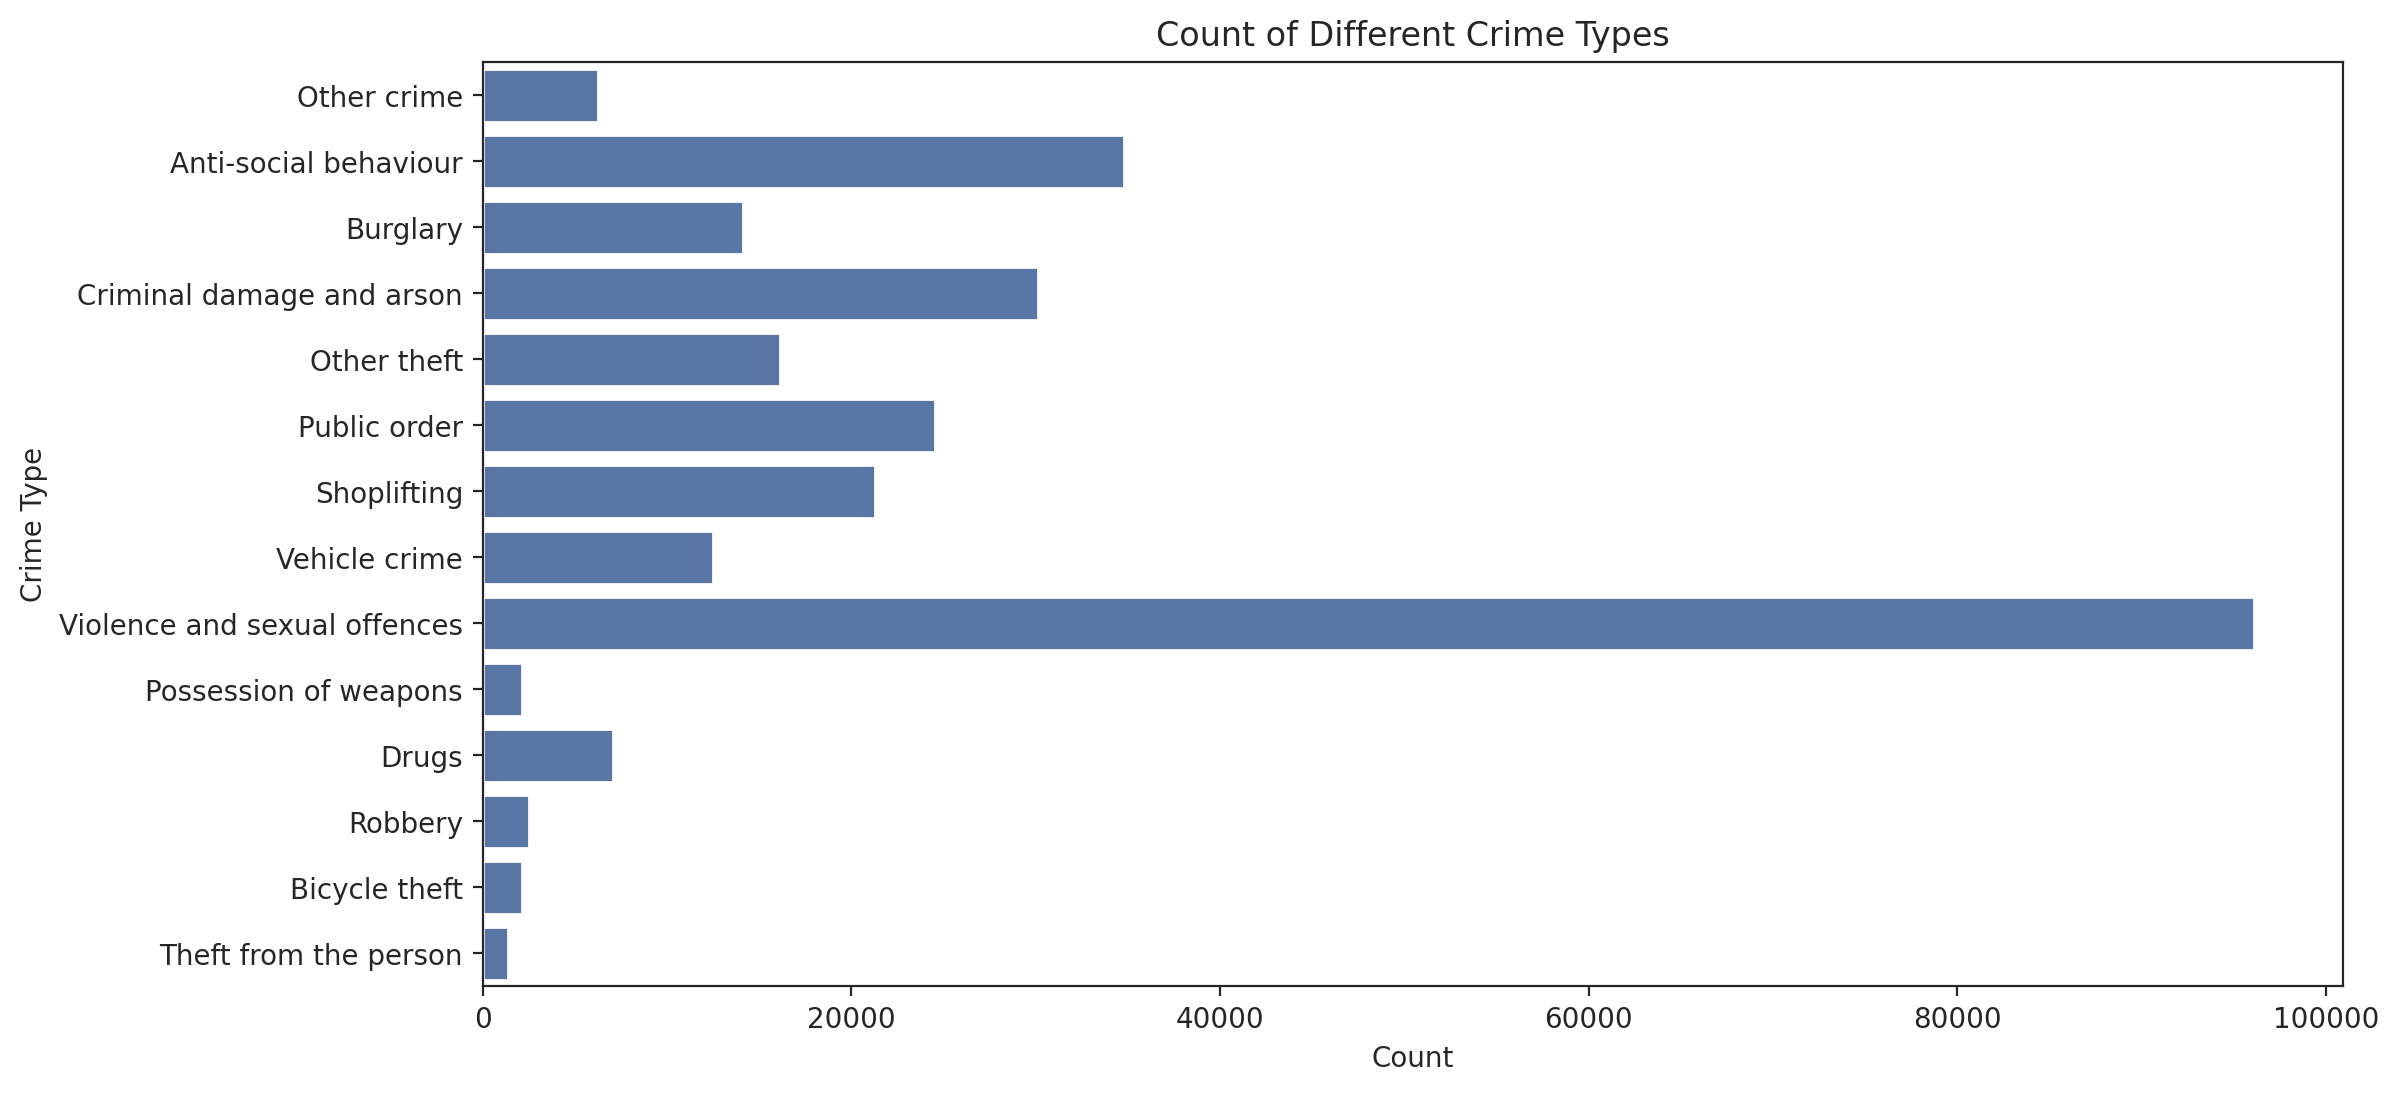

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Crime_type', data=cle_new)
plt.title('Count of Different Crime Types')
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.show()

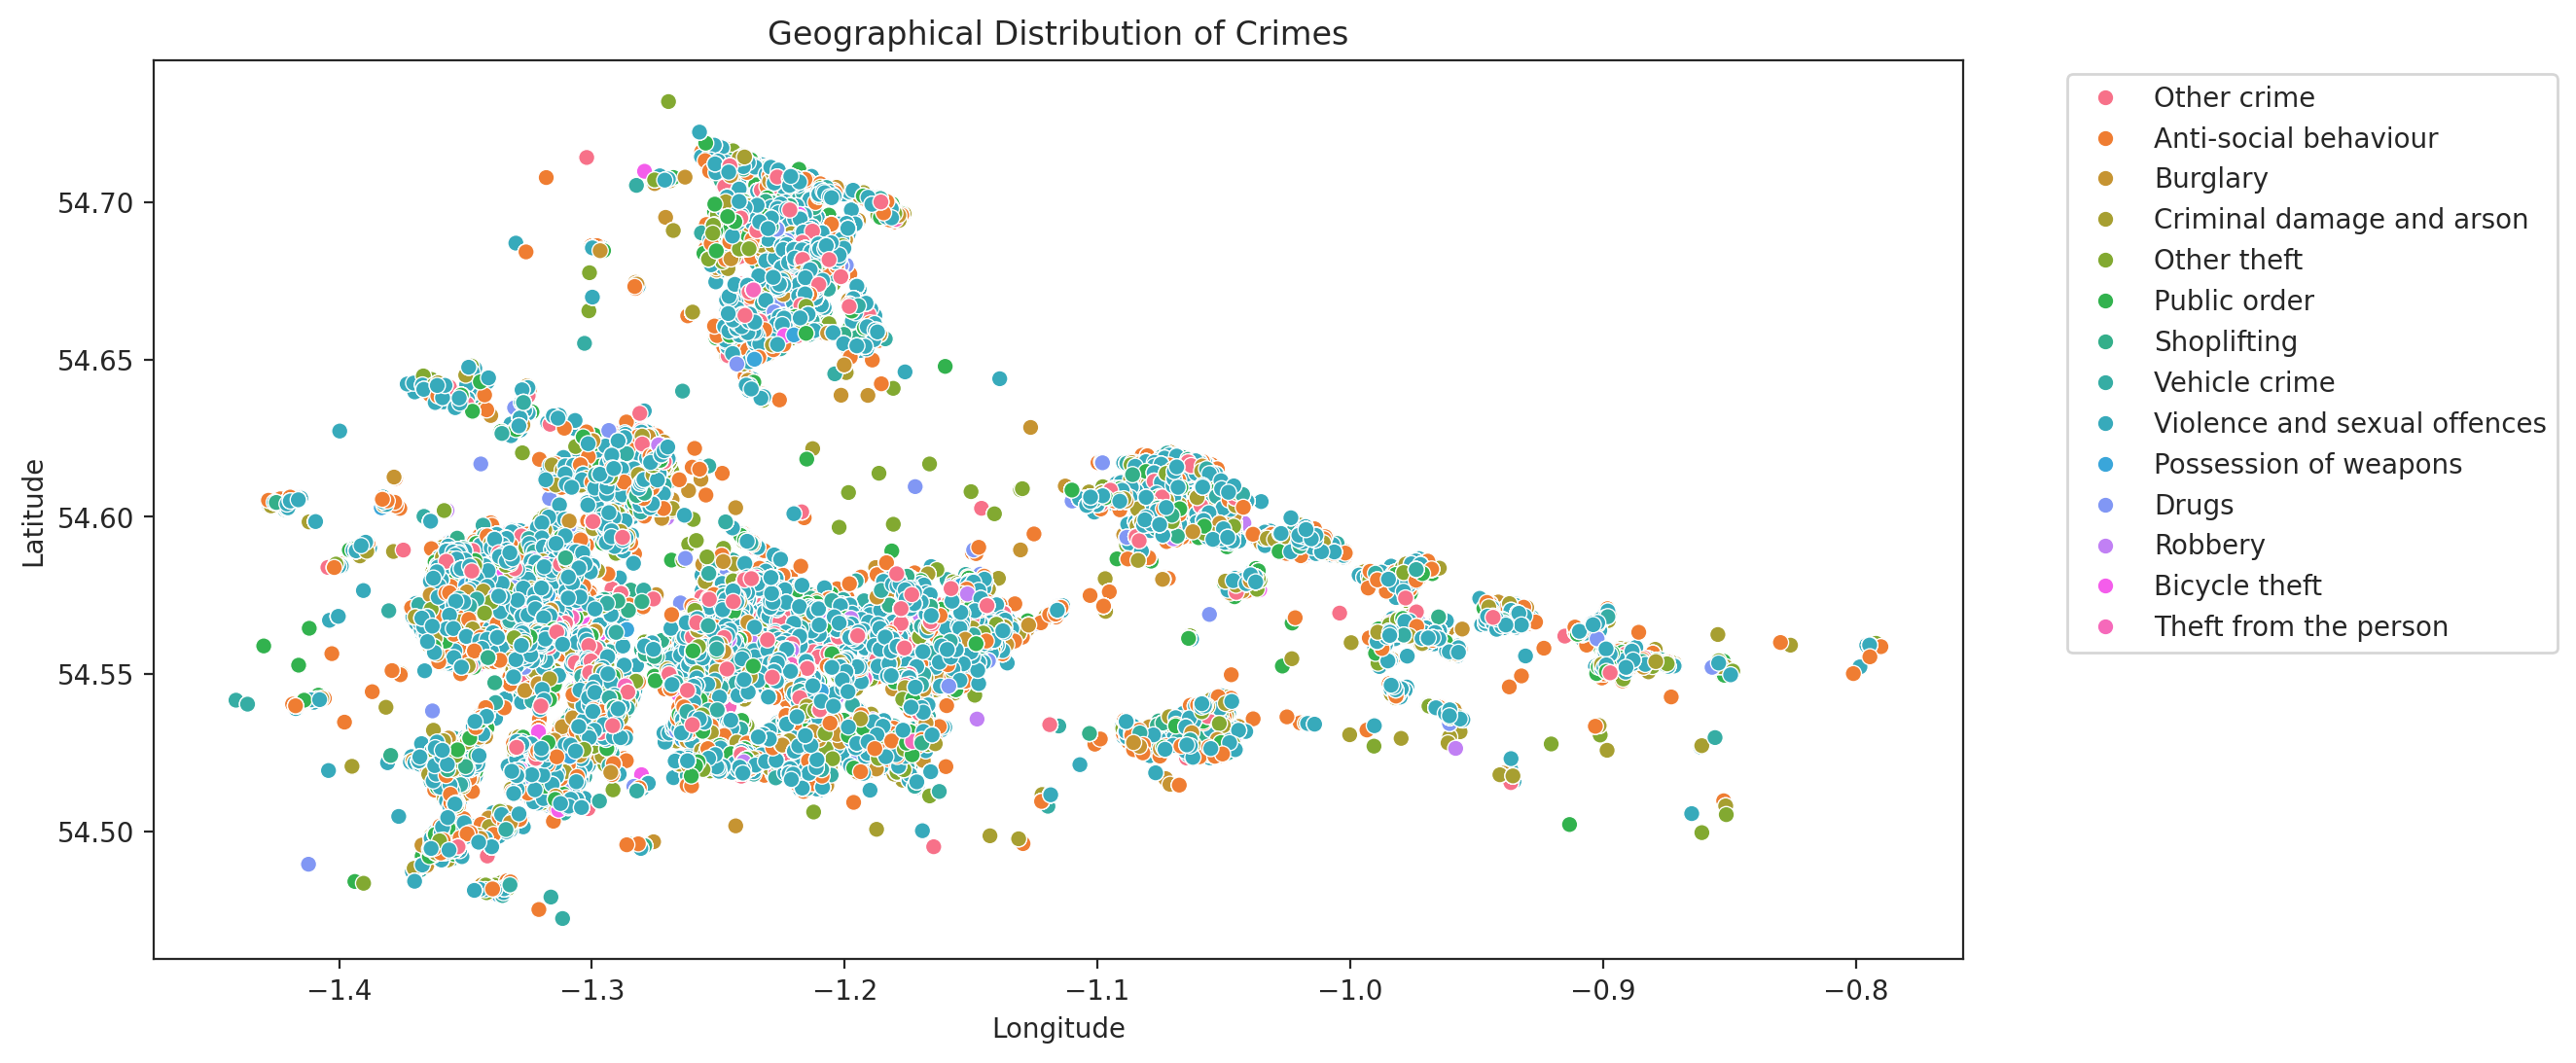

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Crime_type', data=cle_new)
plt.title('Geographical Distribution of Crimes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


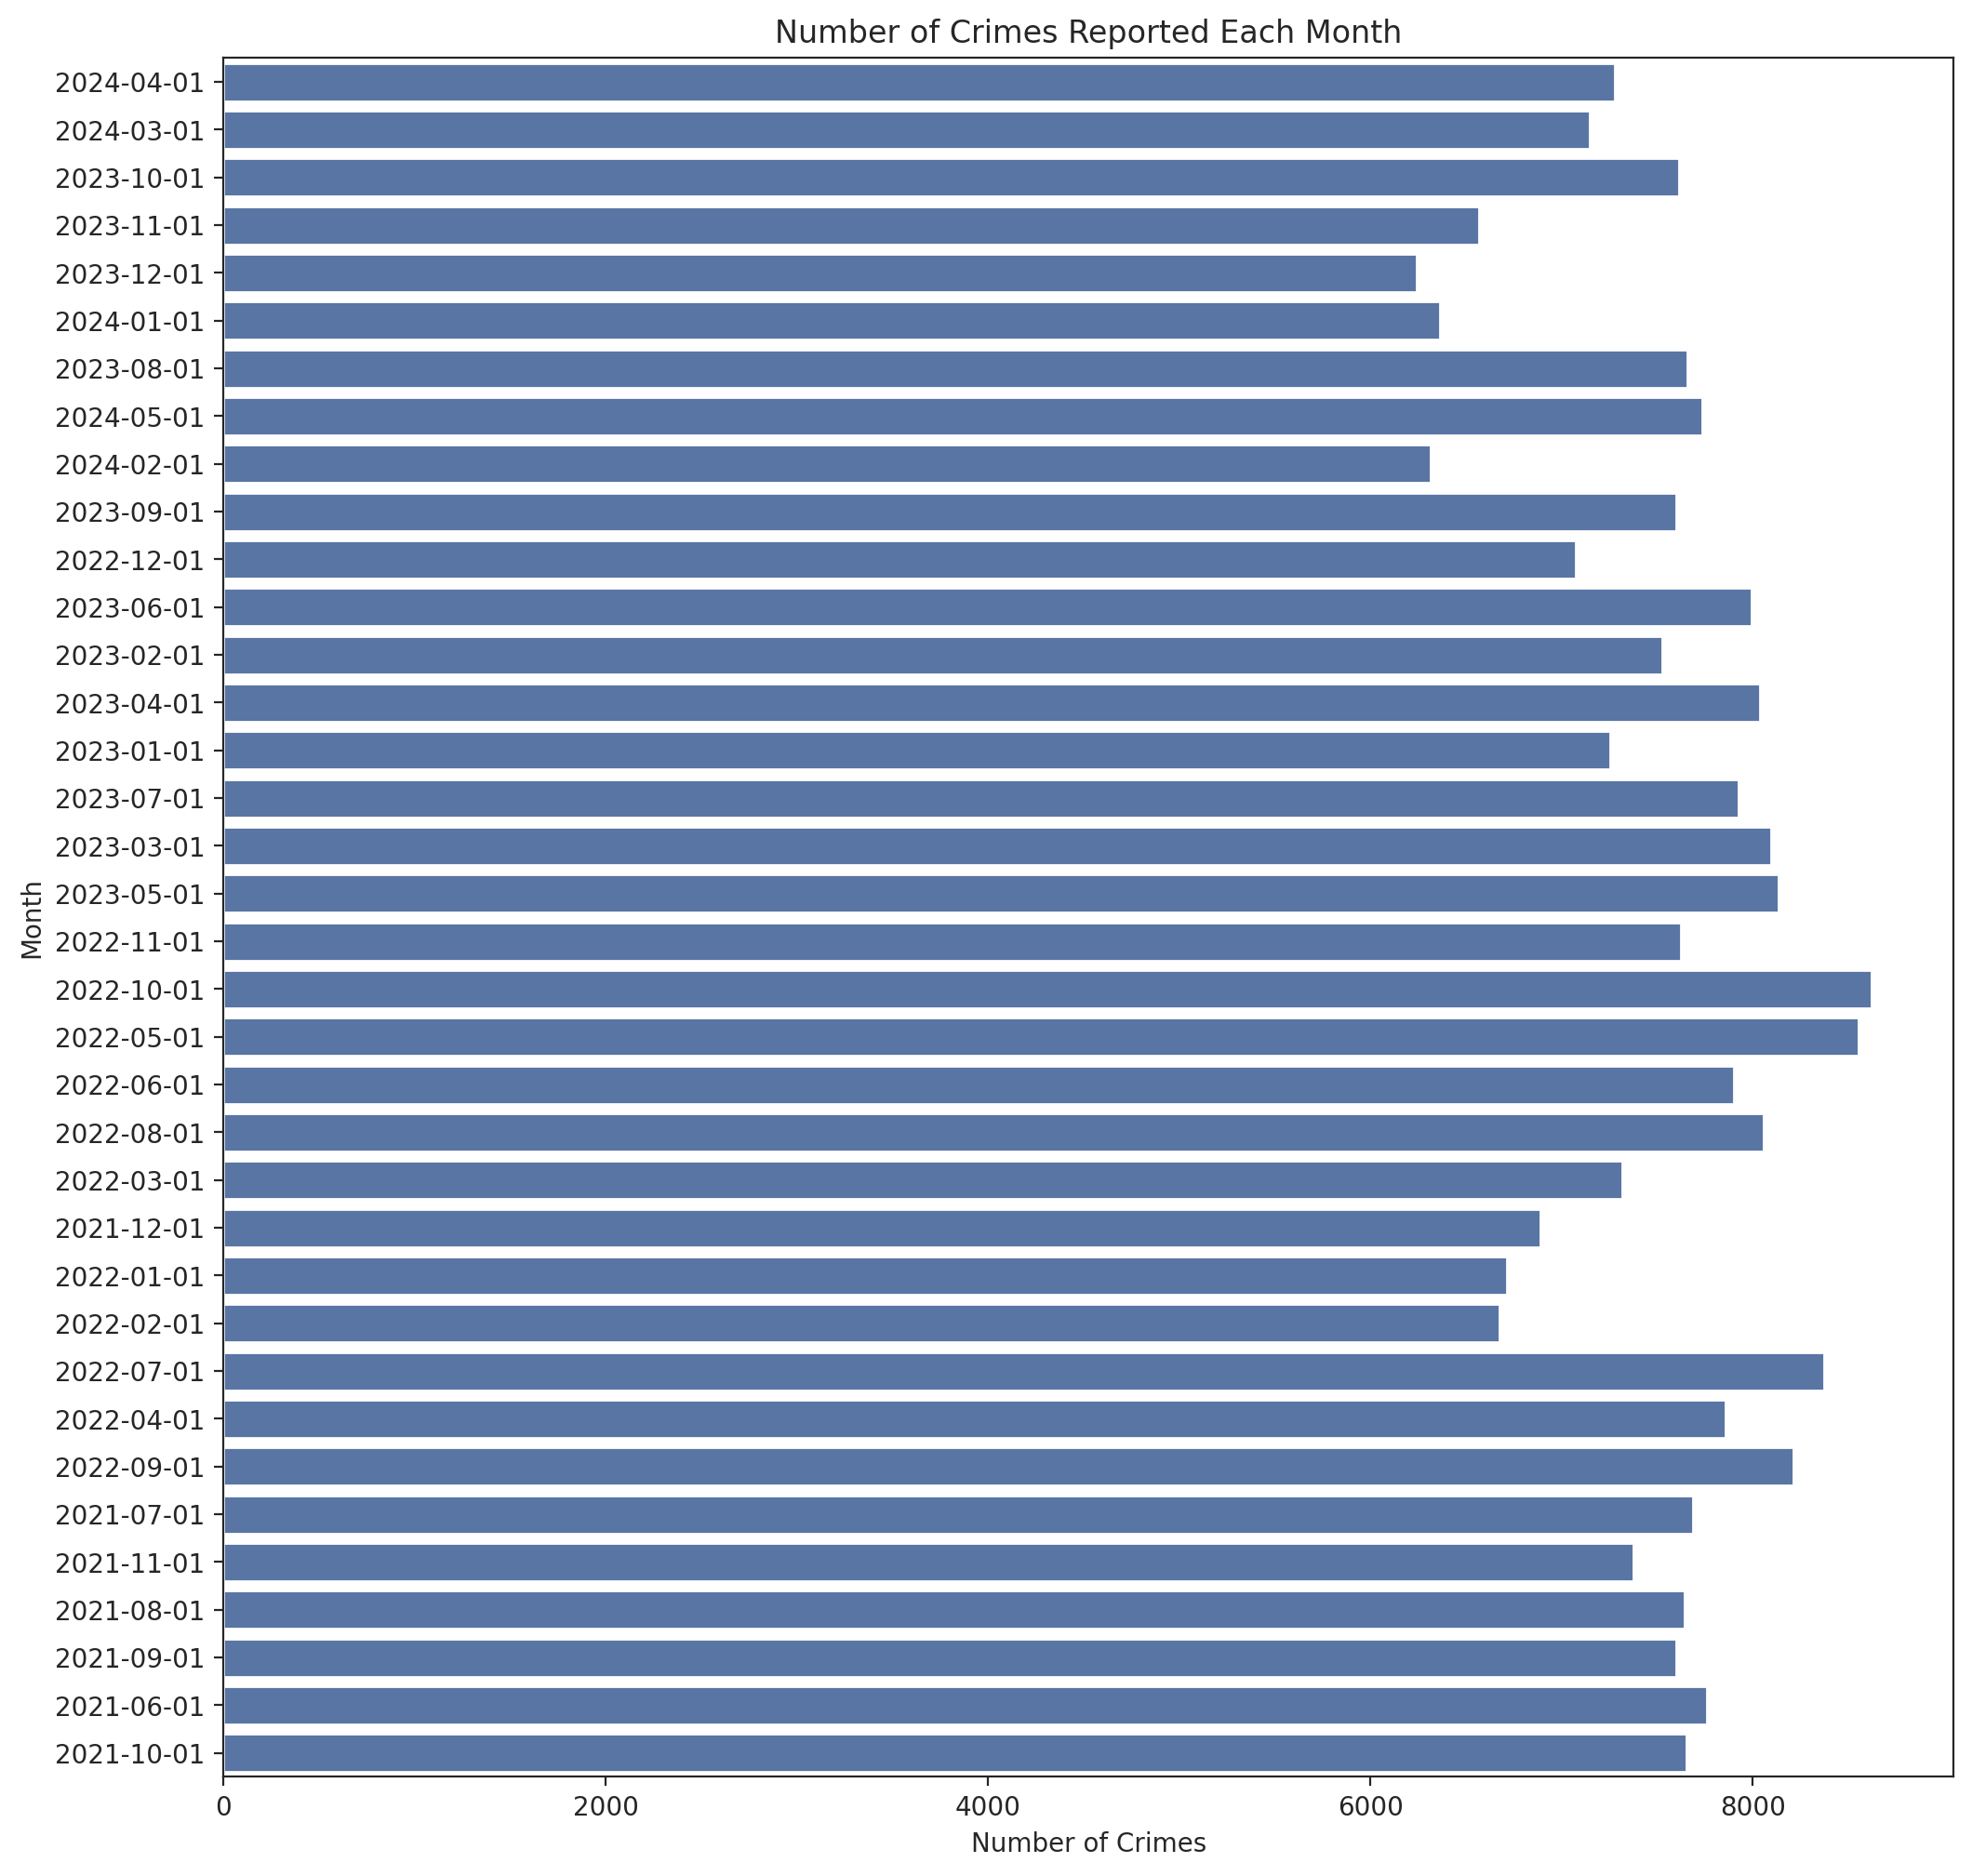

In [ ]:
plt.figure(figsize=(12, 12))
sns.countplot(y='Month', data=cle_new)
plt.title('Number of Crimes Reported Each Month')
plt.ylabel('Month')
plt.xlabel('Number of Crimes')
plt.show()

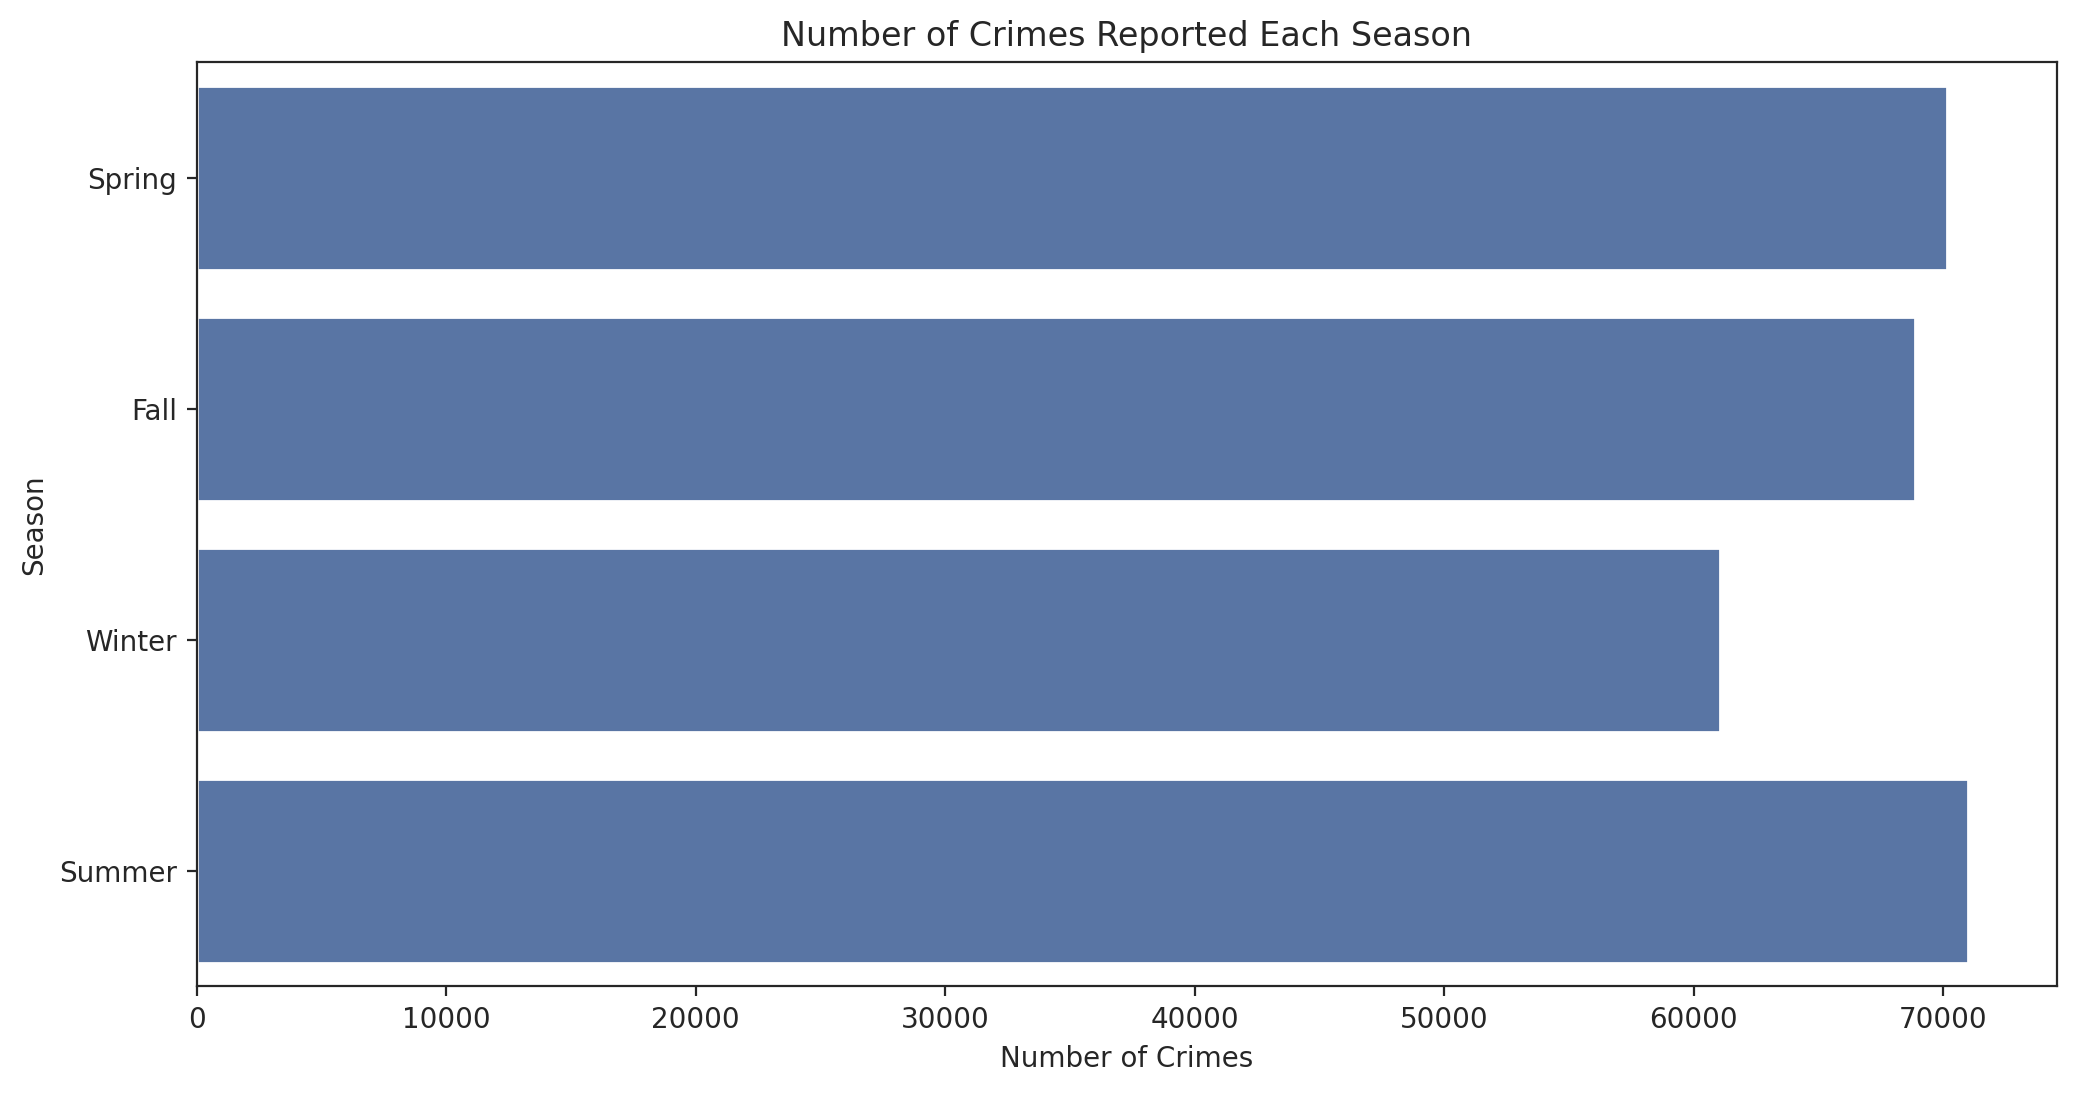

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='season', data=cle_new)
plt.title('Number of Crimes Reported Each Season')
plt.ylabel('Season')
plt.xlabel('Number of Crimes')
plt.show()

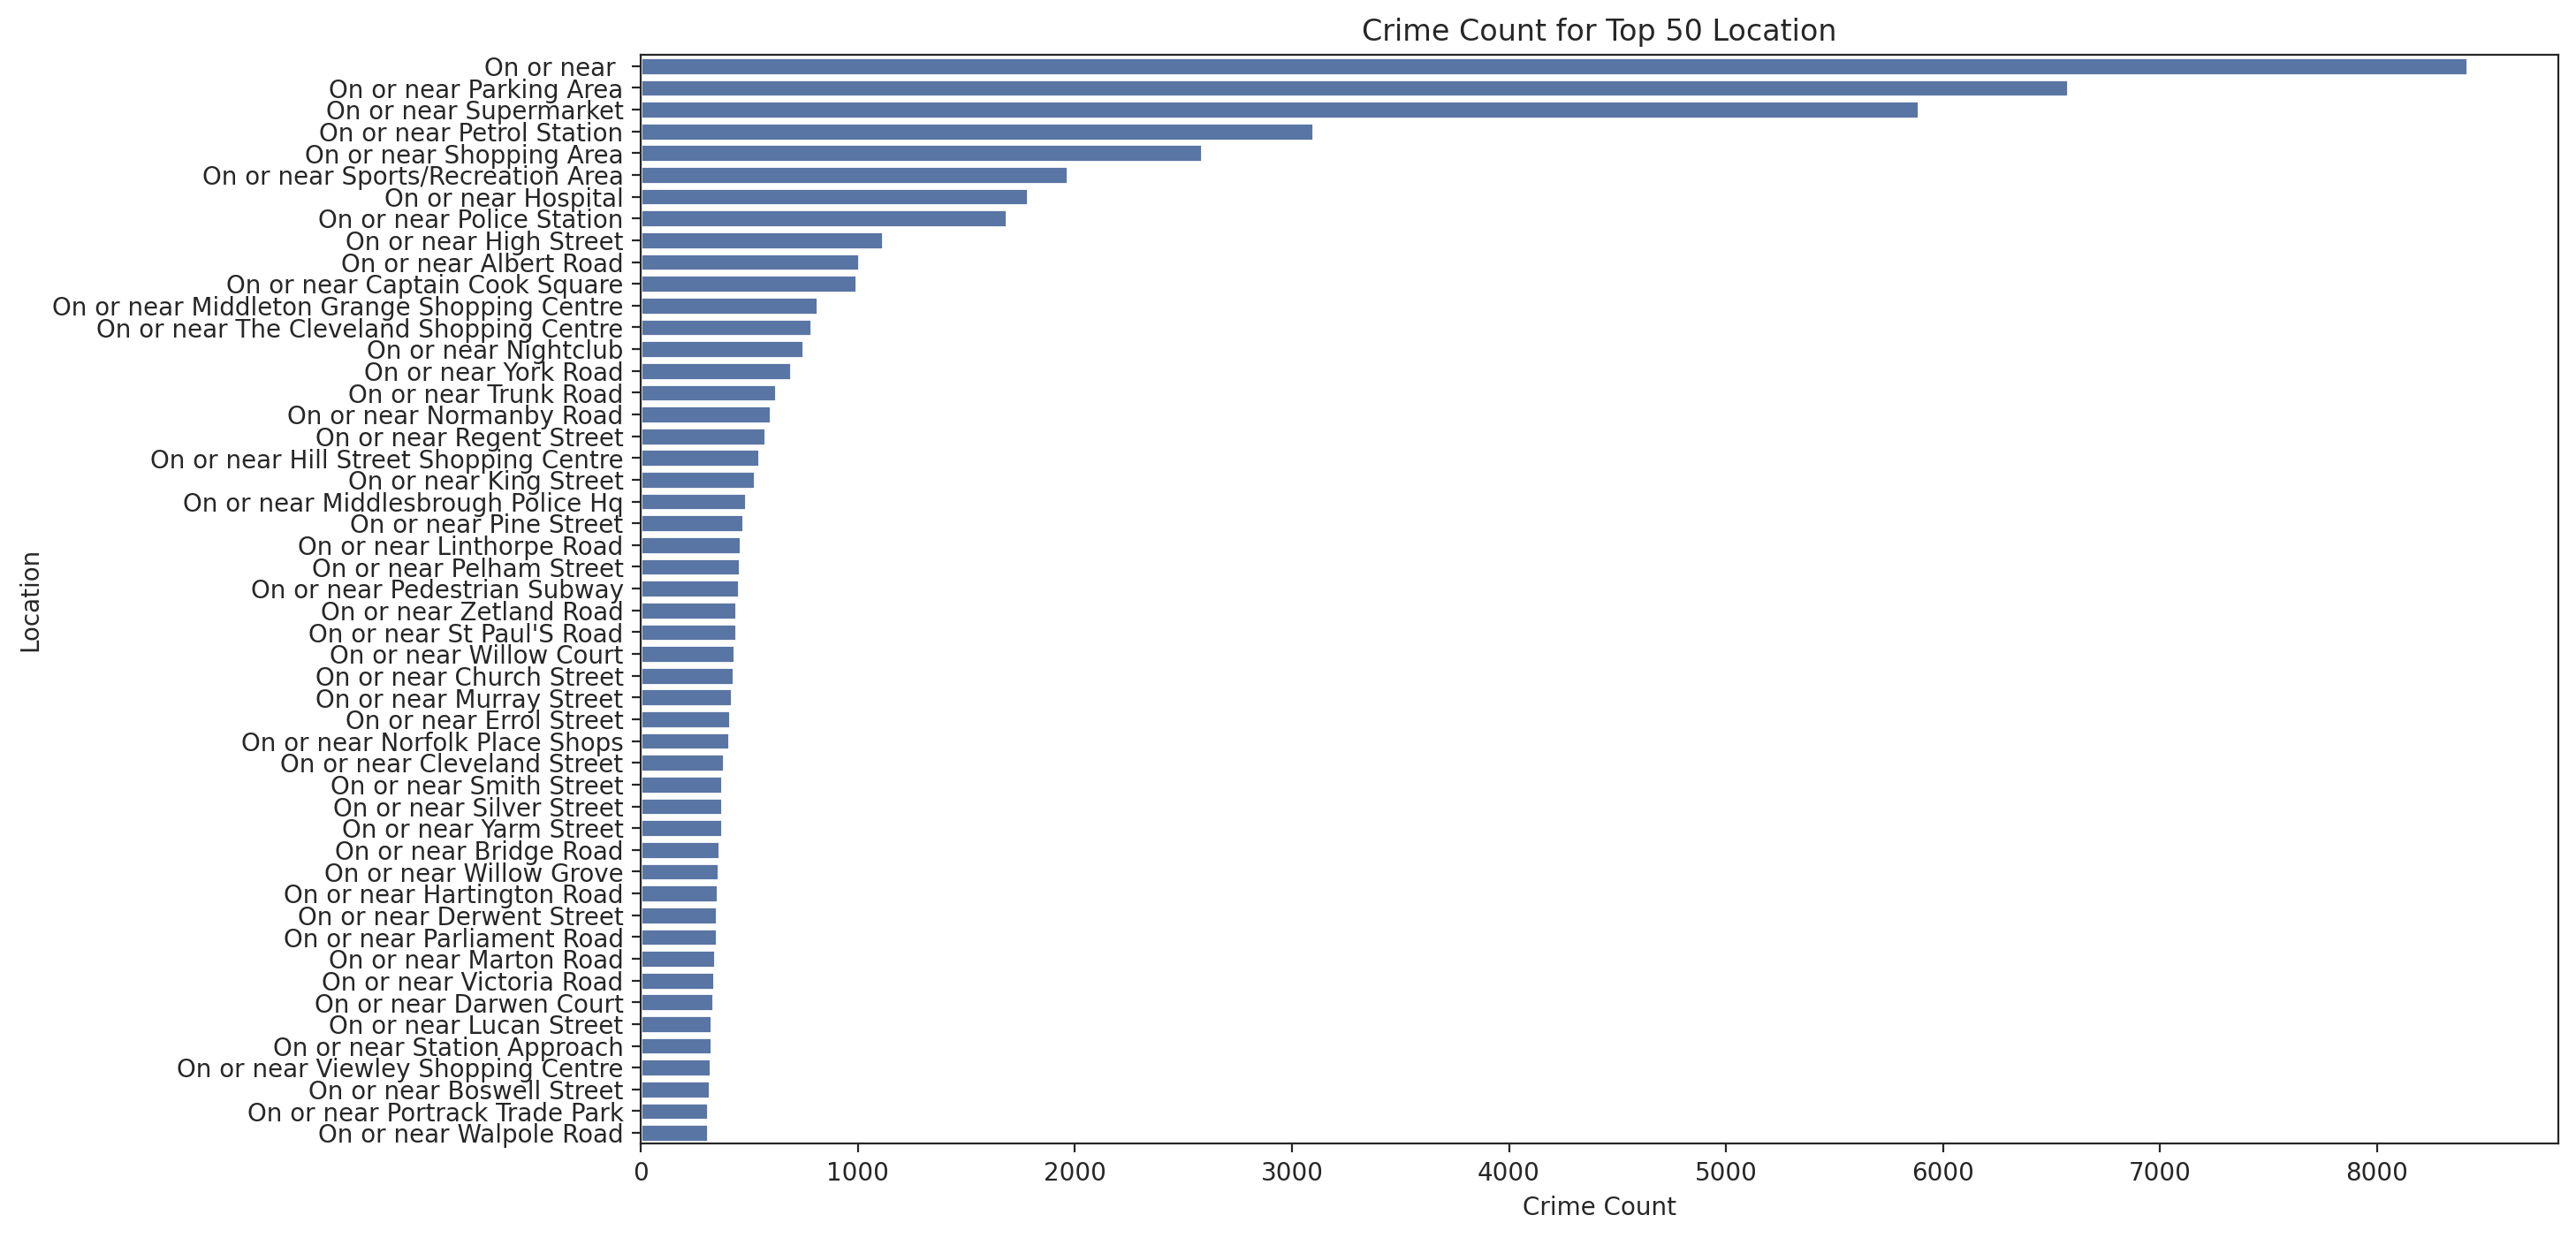

In [ ]:
top_50_location = cle_new['Location'].value_counts().nlargest(50).index

# Plot the results using countplot for the top 50 location names
plt.figure(figsize=(14, 8))
sns.countplot(y='Location', data=cle_new[cle_new['Location'].isin(top_50_location)], order=top_50_location)
plt.title('Crime Count for Top 50 Location')
plt.xlabel('Crime Count')
plt.ylabel('Location')
plt.show()

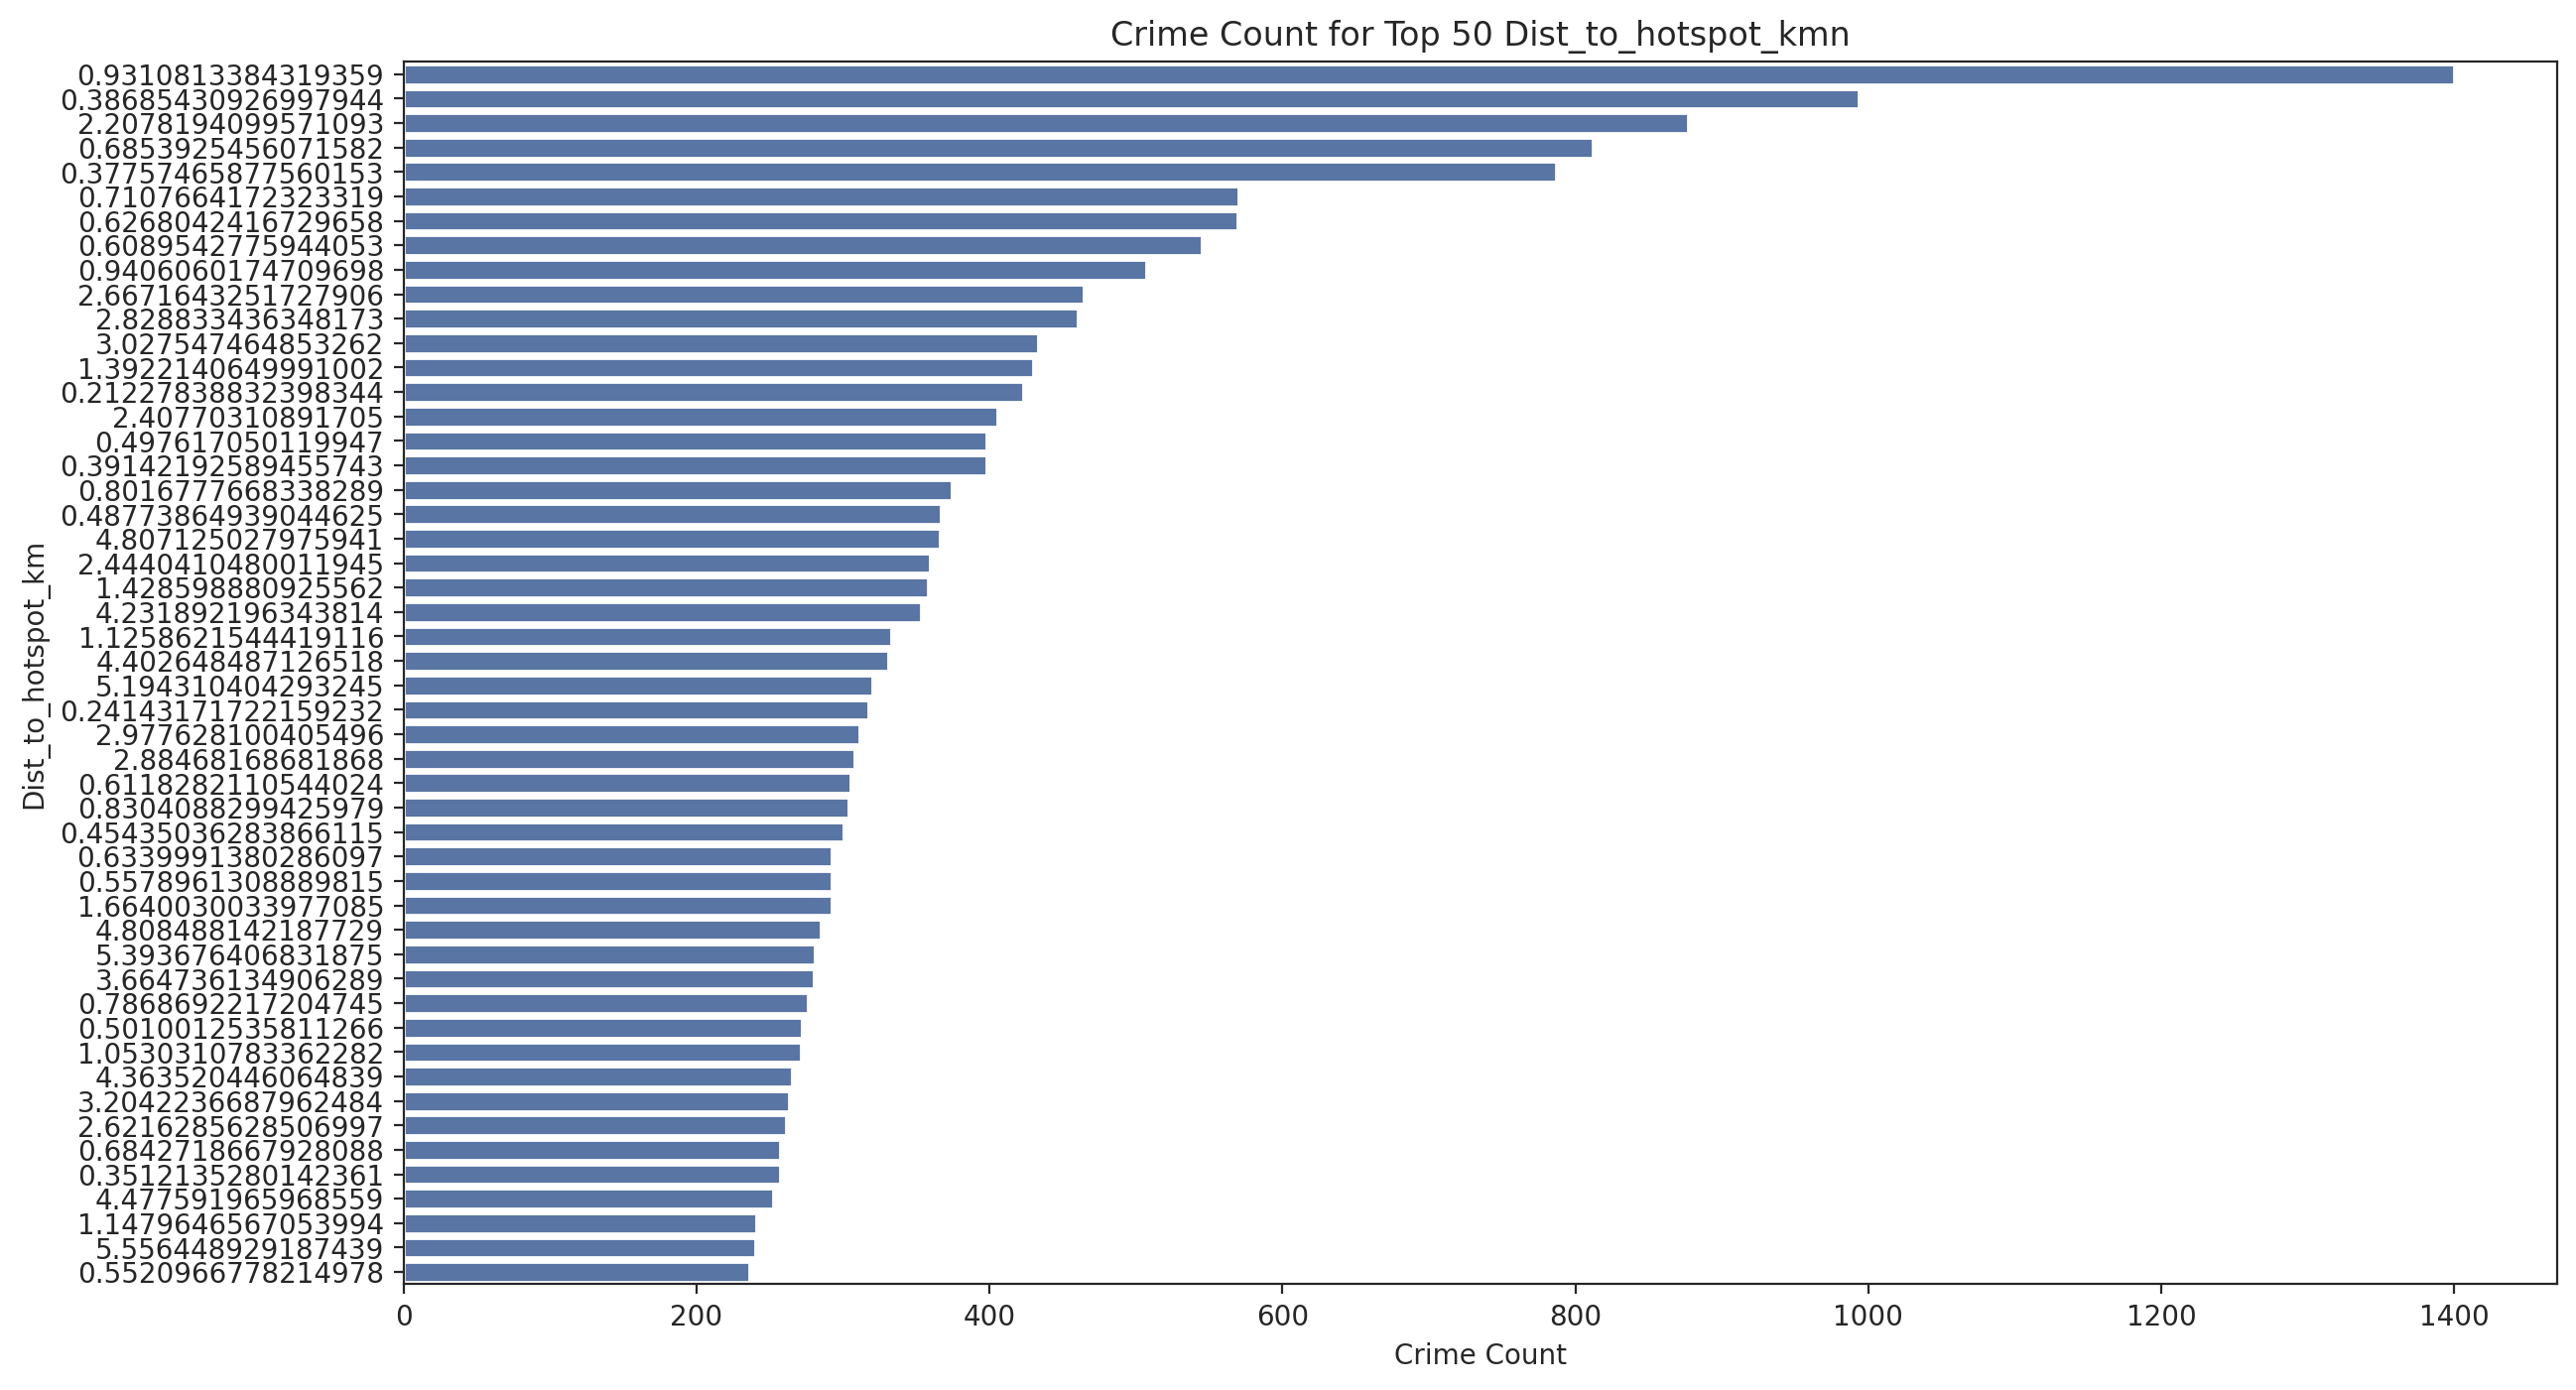

In [ ]:
top_50_Dist_to_hotspot_km = cle_new['Dist_to_hotspot_km'].value_counts().nlargest(50).index

# Plot the results using countplot for the top 50 location names
plt.figure(figsize=(14, 8))
sns.countplot(y='Dist_to_hotspot_km', data=cle_new[cle_new['Dist_to_hotspot_km'].isin(top_50_Dist_to_hotspot_km)], order=top_50_Dist_to_hotspot_km)
plt.title('Crime Count for Top 50 Dist_to_hotspot_kmn')
plt.xlabel('Crime Count')
plt.ylabel('Dist_to_hotspot_km')
plt.show()

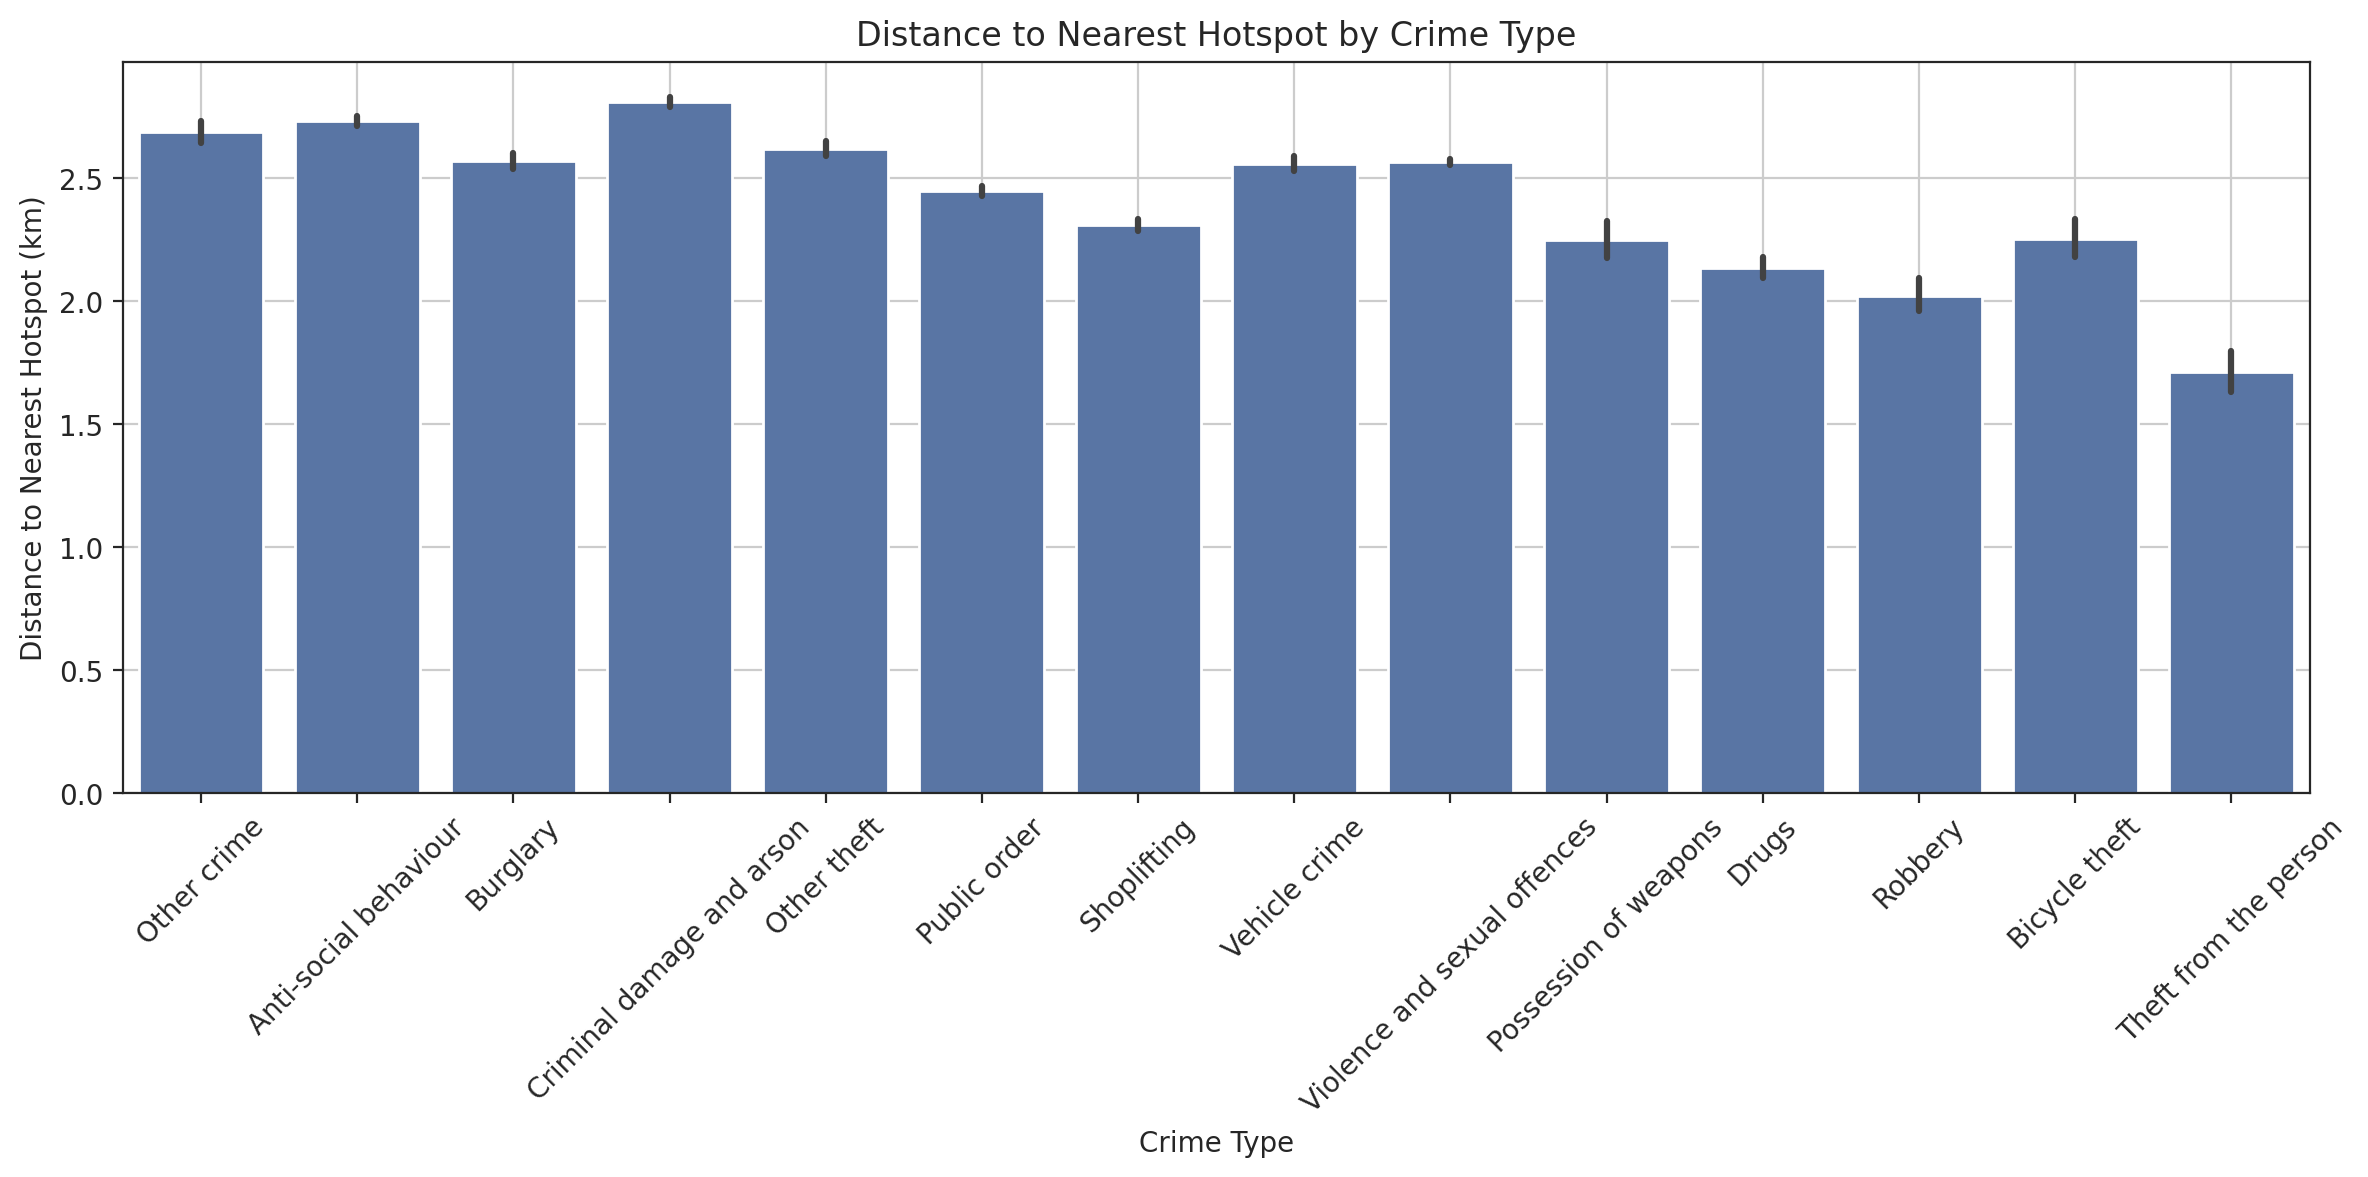

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cle_new, x='Crime_type', y='Dist_to_hotspot_km')
plt.xlabel('Crime Type')
plt.ylabel('Distance to Nearest Hotspot (km)')
plt.title('Distance to Nearest Hotspot by Crime Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

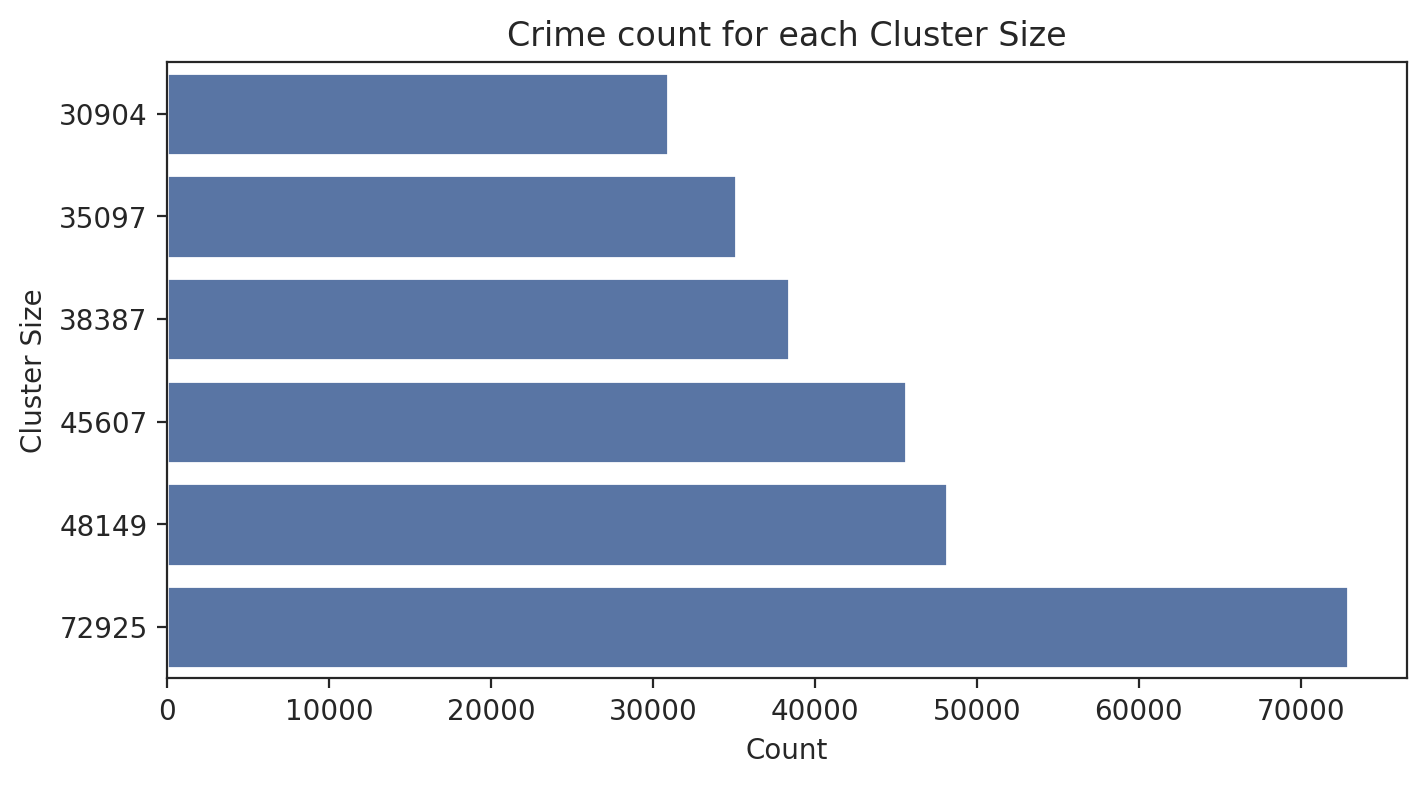

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y='Cluster_Size', data=cle_new)
plt.title('Crime count for each Cluster Size')
plt.xlabel('Count')
plt.ylabel('Cluster Size')
plt.show()

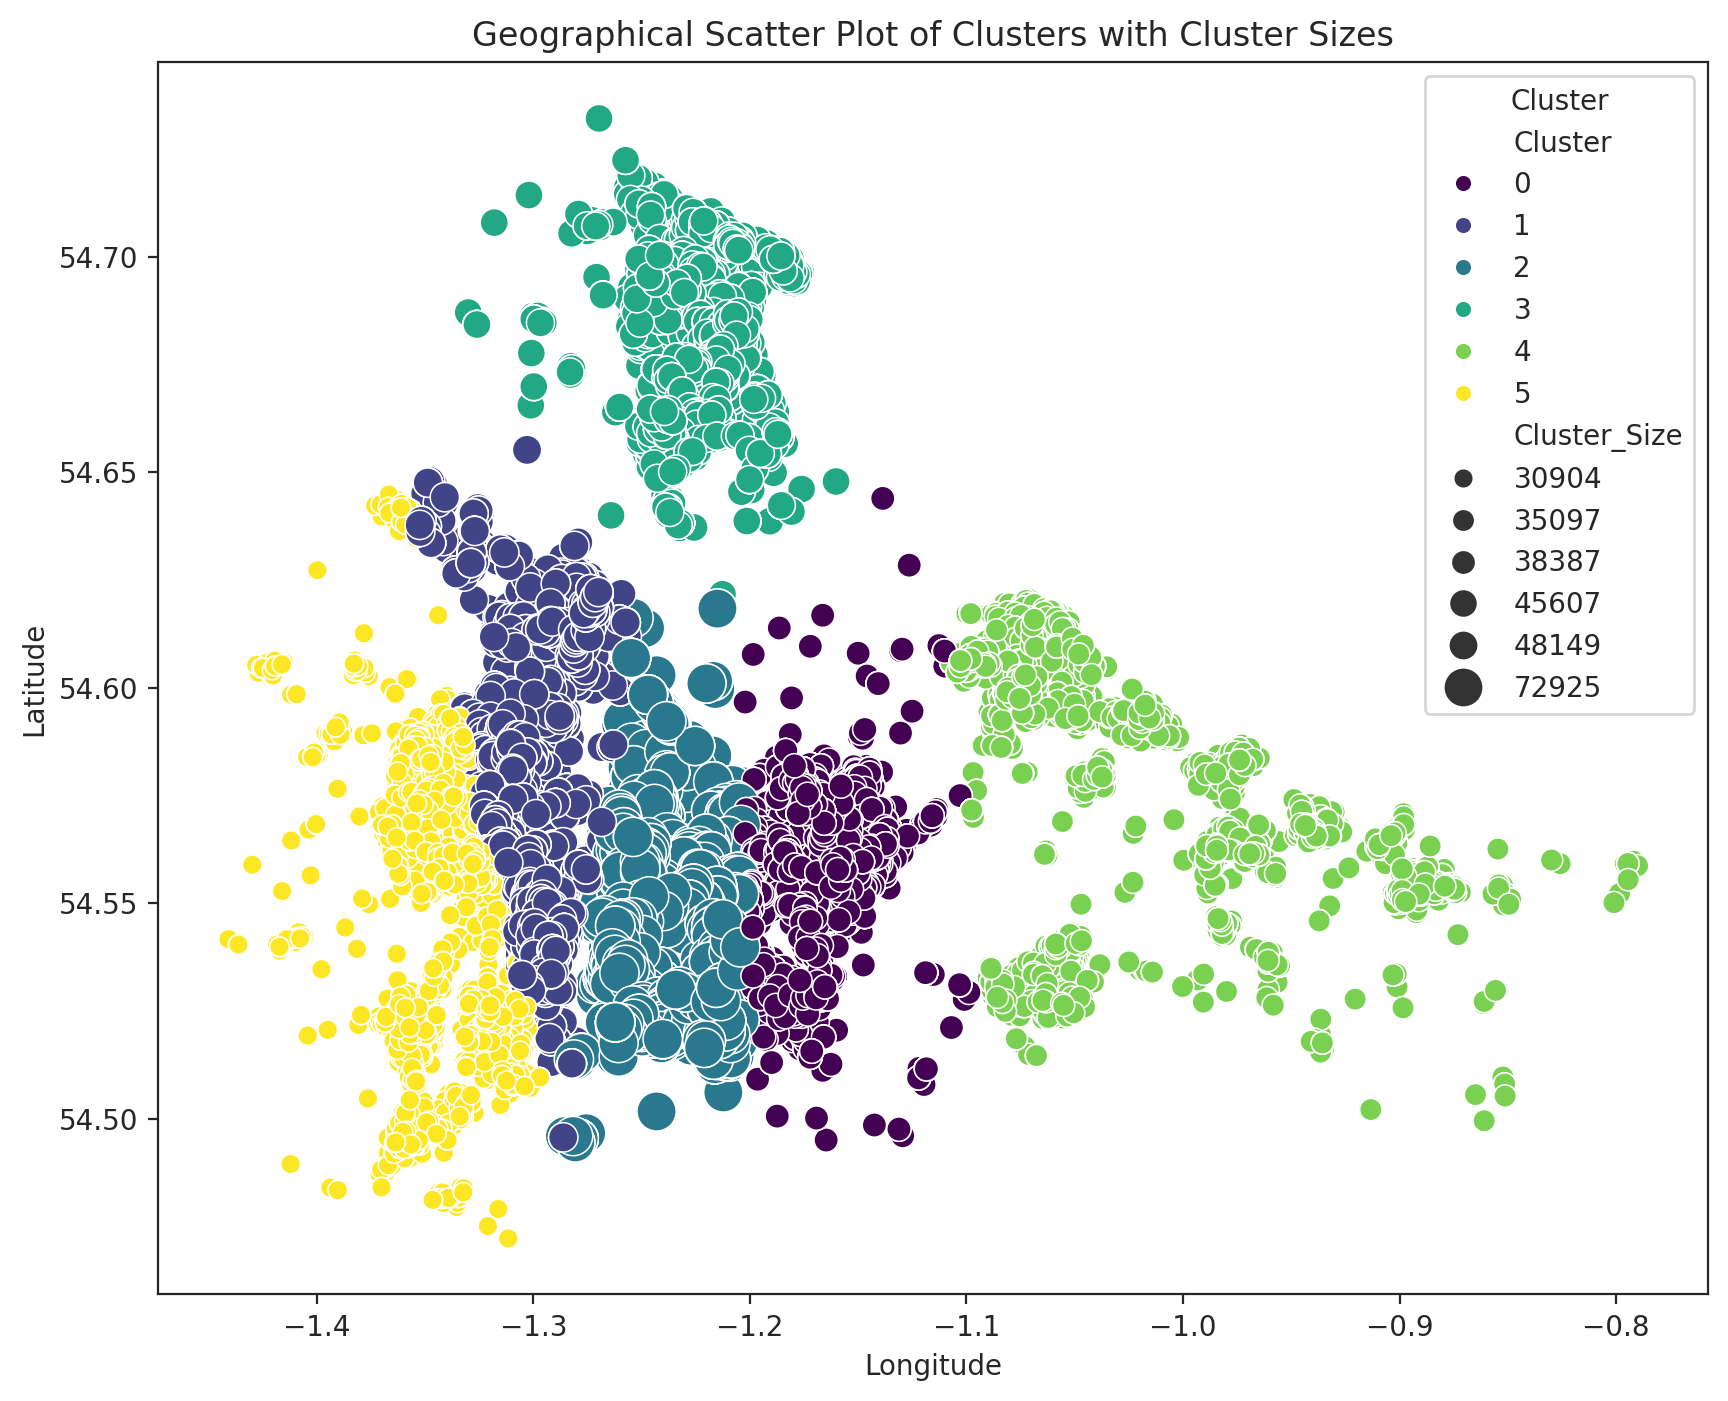

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', size='Cluster_Size', sizes=(50, 200), data=cle_new, palette='viridis', legend='full')
plt.title('Geographical Scatter Plot of Clusters with Cluster Sizes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [ ]:
cle_new = cle_new.drop(columns = ['Crime ID', 'Reported by', 'Falls within', 'LSOA_name', 'Last outcome category', 'Context', 'Month', 'Location', 'Cluster', 'Cluster_Size', 'month'])

In [ ]:
cle_new.count()

Longitude                 271069
Latitude                  271069
LSOA_code                 271069
Crime_type                271069
Dist_to_hotspot_km        271069
year                      271069
season                    271069
Crime_count_per_season    271069
dtype: int64

In [ ]:
X = cle_new.drop(columns='Crime_count_per_season')
y = cle_new['Crime_count_per_season']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_test.head(10)

108127    0.693147
248754    2.564949
146839    1.098612
144886    2.079442
207917    1.386294
117867    4.700480
160252    2.890372
143600    1.791759
8325      2.397895
84451     2.197225
Name: Crime_count_per_season, dtype: float64

In [ ]:
y_train.shape

(216855,)

In [ ]:
y_test.shape

(54214,)

In [ ]:
X_train.shape

(216855, 7)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

In [ ]:
def create_pp_ppln(X, linear_model=False):
    """creates a default preprocessing pipeline for numeric and categorical data
    using simple imputers, scalers, and encoders. It relies on latest versions
    of sklearn so as to produce pandas outputs.

    X: the dataset with the features (needed for feature names)

    returns the Pipeline object
    """
    numeric_features = ['year', 'Latitude', 'Longitude', 'Dist_to_hotspot_km']
    numeric_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="mean"))
        ]
    )

    if linear_model:
        numeric_transformer.steps.extend([
            ("scaler", StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ])


    categorical_features = ['LSOA_code', 'Crime_type', 'season']
    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("te", TargetEncoder(handle_missing='return_nan')),
        ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return preprocessor

In [ ]:
def create_est_ppln(est, X, linear_model=False):
    """ """
    regr_pipe = Pipeline(
        steps=[
            ("pp", create_pp_ppln(X, linear_model)),
            ("est", est)
        ]
    )

    return regr_pipe

In [ ]:
rfr = create_est_ppln(RandomForestRegressor(max_depth=18), X_train)

xgbr = create_est_ppln(XGBRegressor(max_depth=10), X_train)

dtr = create_est_ppln(DecisionTreeRegressor(max_depth=18), X_train)

my_models= [rfr, xgbr, dtr]

In [ ]:
rfr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['year', 'Latitude',
                                                   'Longitude',
                                                   'Dist_to_hotspot_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(handle_missing='return_nan'))]),
                                                  ['LSOA_code', 'Crime_type',
                                                   'season'])],
                                   verbose_feature_names_out=False)),
                ('est', RandomForestRegressor(max_depth=18))])

In [ ]:
def plot_est_feat_imp_barh(est, feat_names, ax=None, top_feat_k=10, style_kws={}):
    if ax is None:
        fig, ax = plt.subplots()

    return pd.Series(
        est.feature_importances_,
        index=feat_names    ).sort_values().tail(top_feat_k).plot.barh(**style_kws)

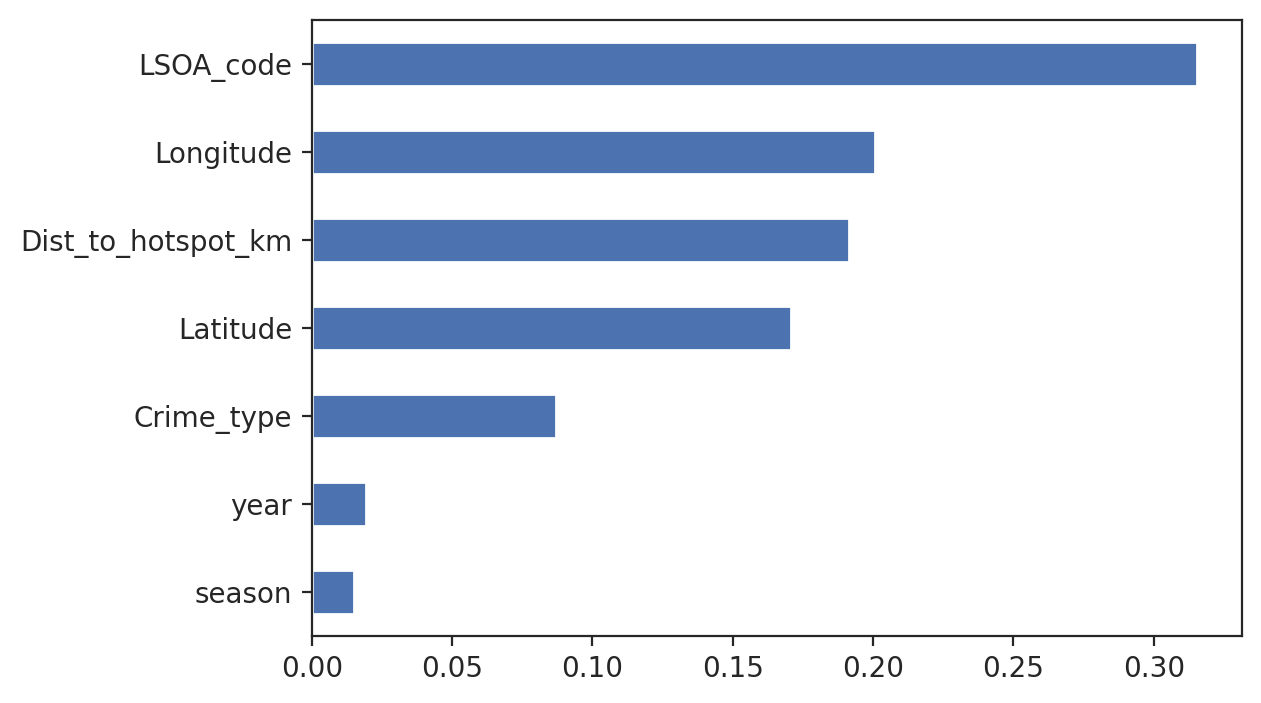

In [ ]:
plot_est_feat_imp_barh(rfr['est'], rfr['pp'].get_feature_names_out());

In [ ]:
rfr.score(X_test, y_test)

0.8291228811719015

In [ ]:
rfr.score(X_train, y_train)

0.8591648667123271

In [ ]:
cross_val_score(rfr, X_train, y_train)

array([0.82491205, 0.82981584, 0.82600049, 0.82721863, 0.8113653 ])

In [ ]:
cross_val_score(rfr, X_test, y_test)

array([0.762697  , 0.74108718, 0.76374204, 0.75739857, 0.73894455])

In [ ]:
mean_absolute_error(y_train, rfr.predict(X_train))

0.4021093289354011

In [ ]:
mean_absolute_error(y_test, rfr.predict(X_test))

0.4399460966156803

In [ ]:
cross_val_score(rfr, X_train, y_train, scoring='neg_mean_absolute_error')

array([-0.44969808, -0.44176626, -0.44682711, -0.44530607, -0.45726655])

In [ ]:
cross_val_score(rfr, X_test, y_test, scoring='neg_mean_absolute_error')

array([-0.520651  , -0.54340349, -0.53209755, -0.5198725 , -0.54200173])

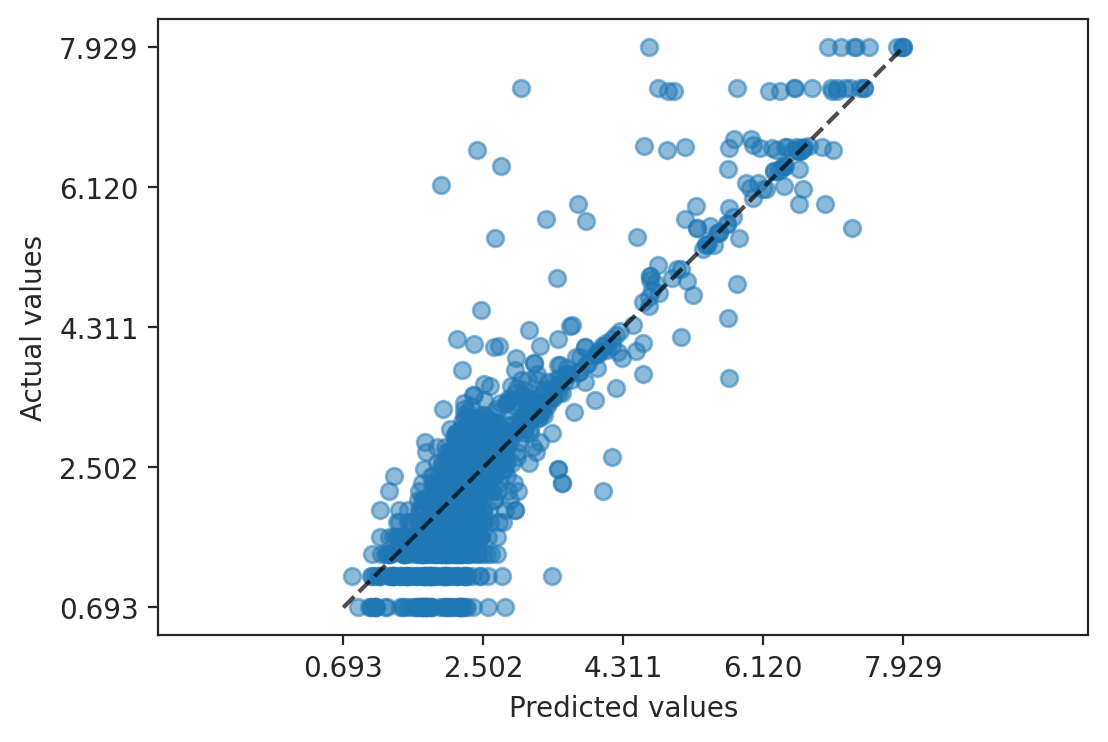

In [ ]:
from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_estimator(
    rfr, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

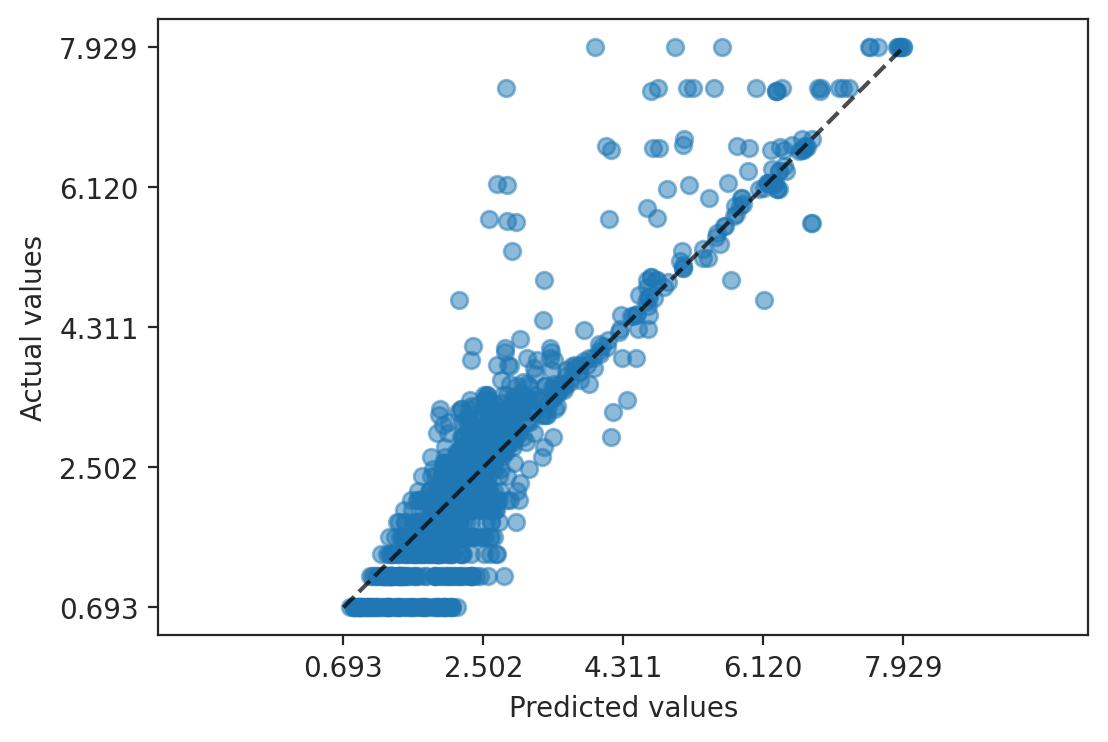

In [ ]:
PredictionErrorDisplay.from_estimator(
    rfr, X_train, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
param_grid = {'est__max_depth': [12, 14, 16, 18]}

In [ ]:
gs_r = GridSearchCV(rfr, param_grid, return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
gs_results = gs_r.fit(X_train, y_train)

In [ ]:
gs_df = pd.DataFrame(gs_results.cv_results_)

In [ ]:
gs_df[['param_est__max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values('rank_test_score')

param_est__max_depth  mean_test_score  mean_train_score  rank_test_score
3                    18        -0.446596         -0.399135                1
2                    16        -0.515631         -0.480985                2
1                    14        -0.594285         -0.570270                3
0                    12        -0.679634         -0.664821                4

In [ ]:
X_train_pp = rfr['pp'].transform(X_train)
column_names = X_train_pp.columns
X_test_pp  = rfr['pp'].transform(X_test)

In [ ]:
!pip install -q shap
import shap
shap.initjs()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
explainer = shap.TreeExplainer(rfr['est'], X_train_pp)

In [ ]:
shap_values_rfr = explainer(X_test_pp, check_additivity=False)

100%|===================| 54210/54214 [68:05<00:00]       

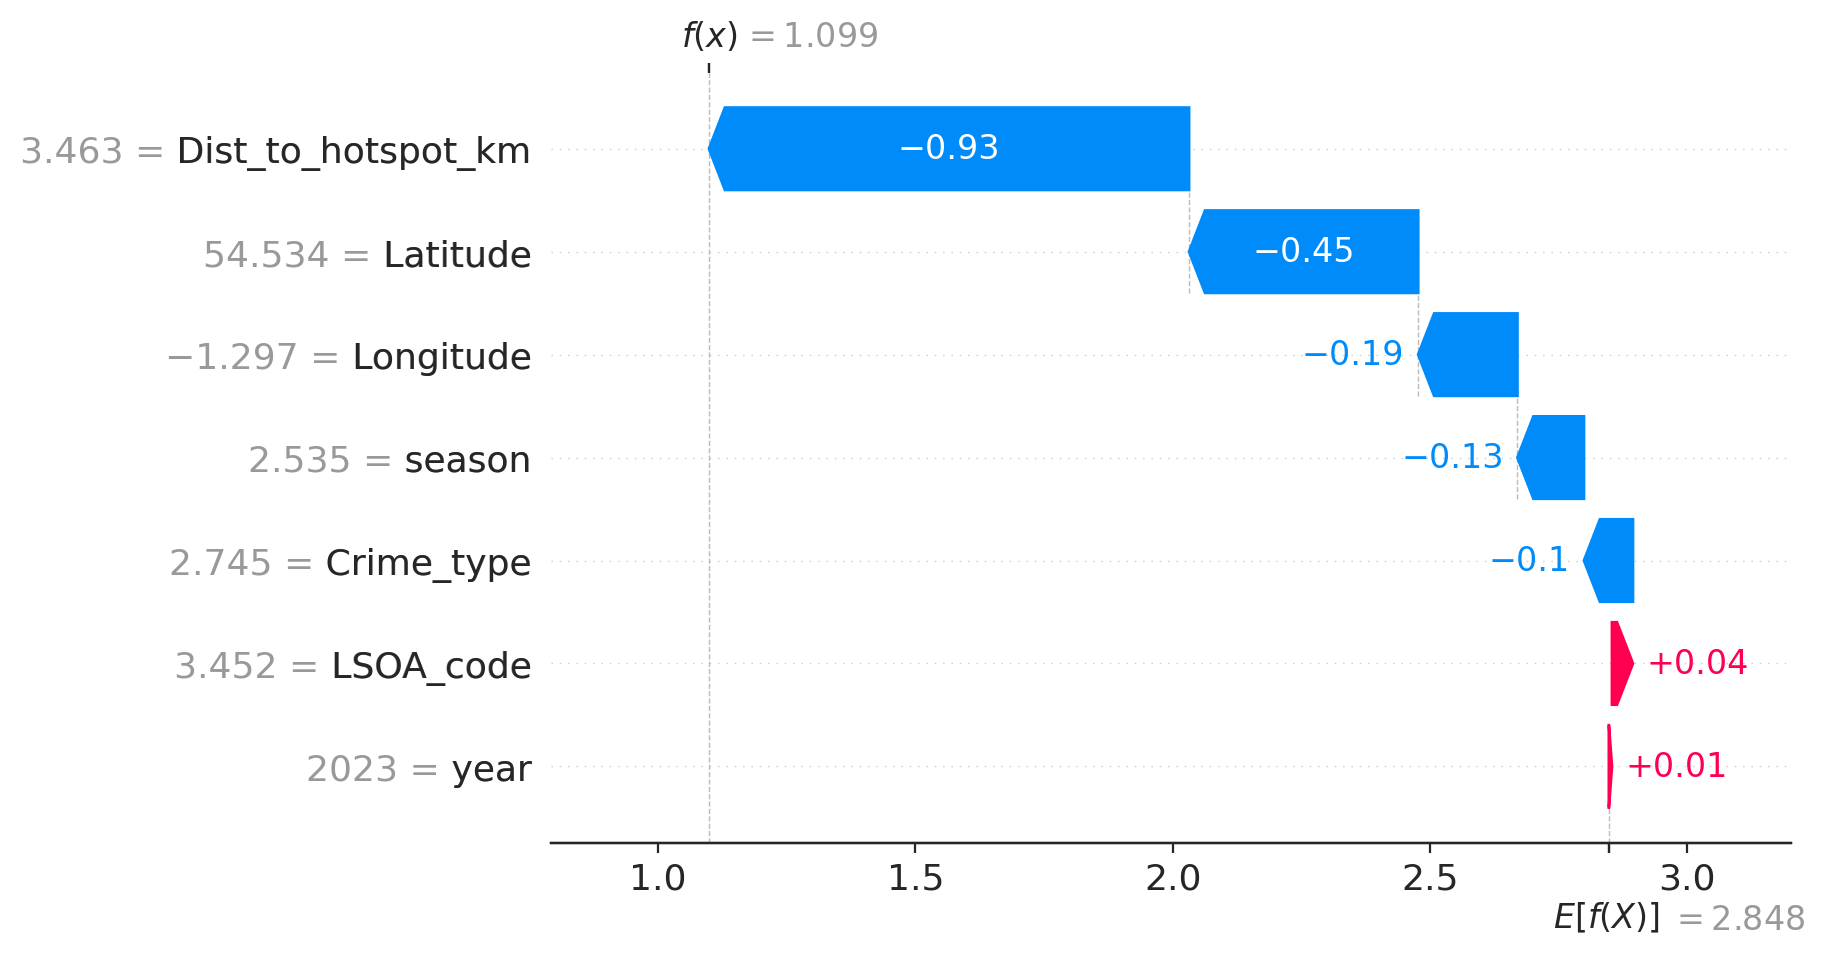

In [ ]:
shap.plots.waterfall(shap_values_rfr[0])

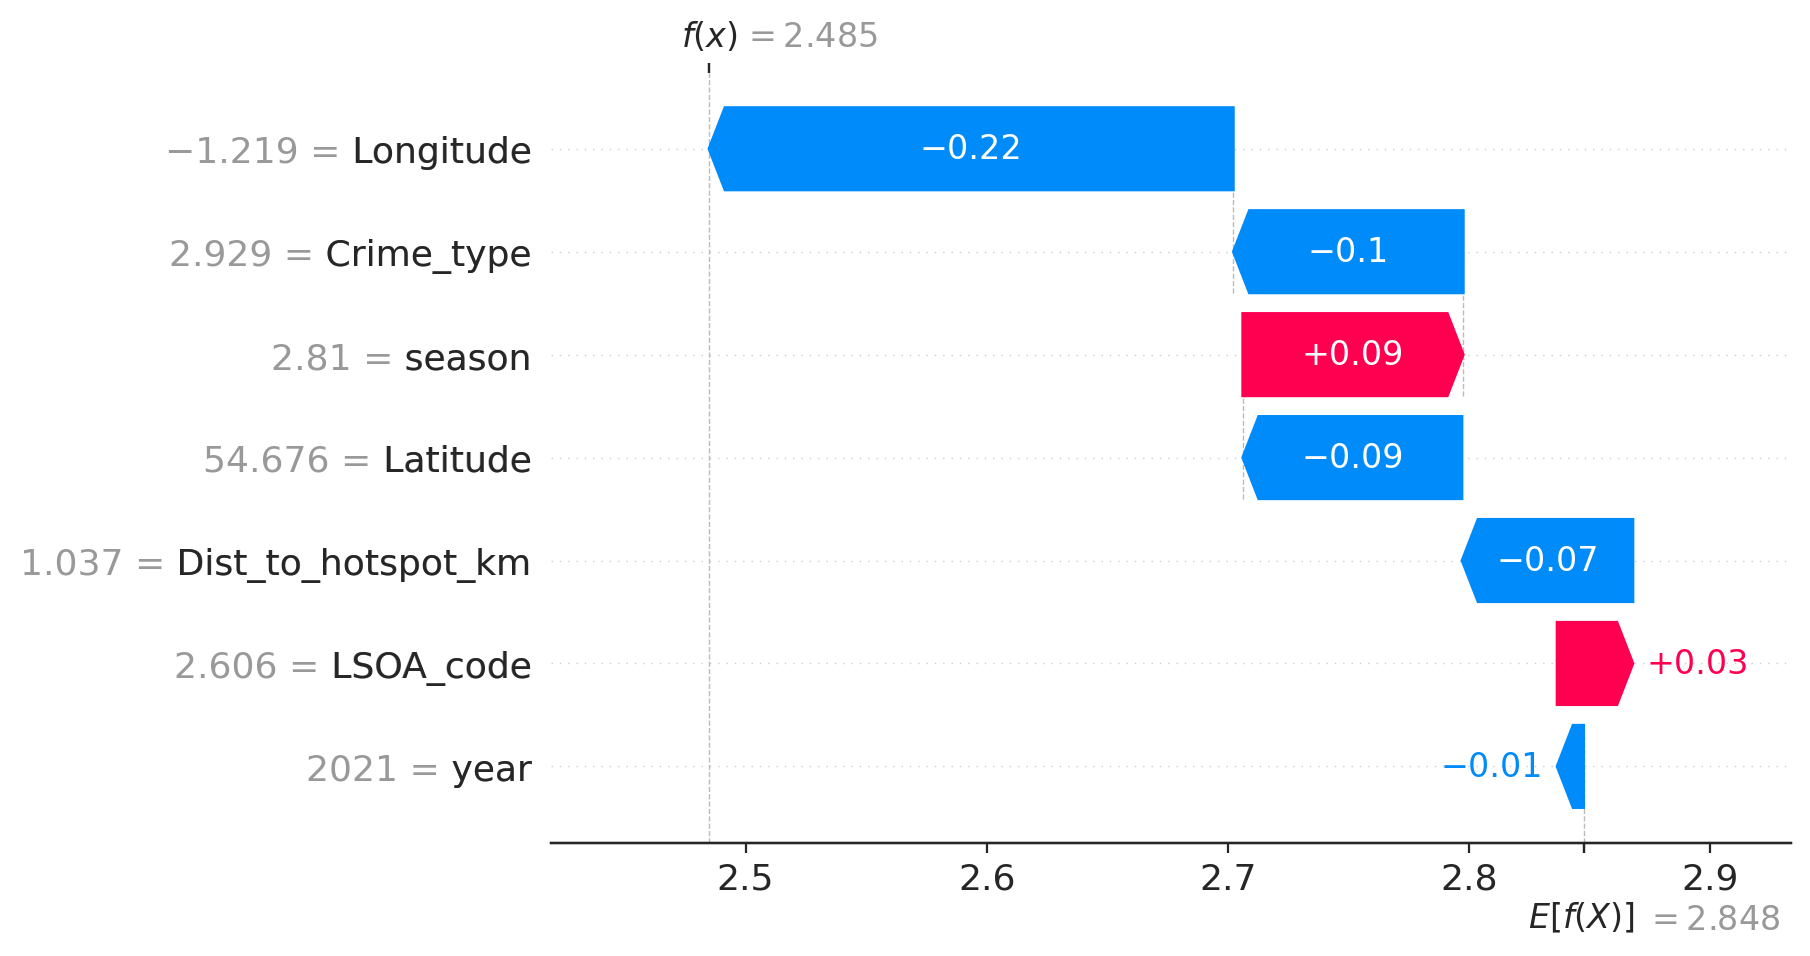

In [ ]:
shap.plots.waterfall(shap_values_rfr[1])

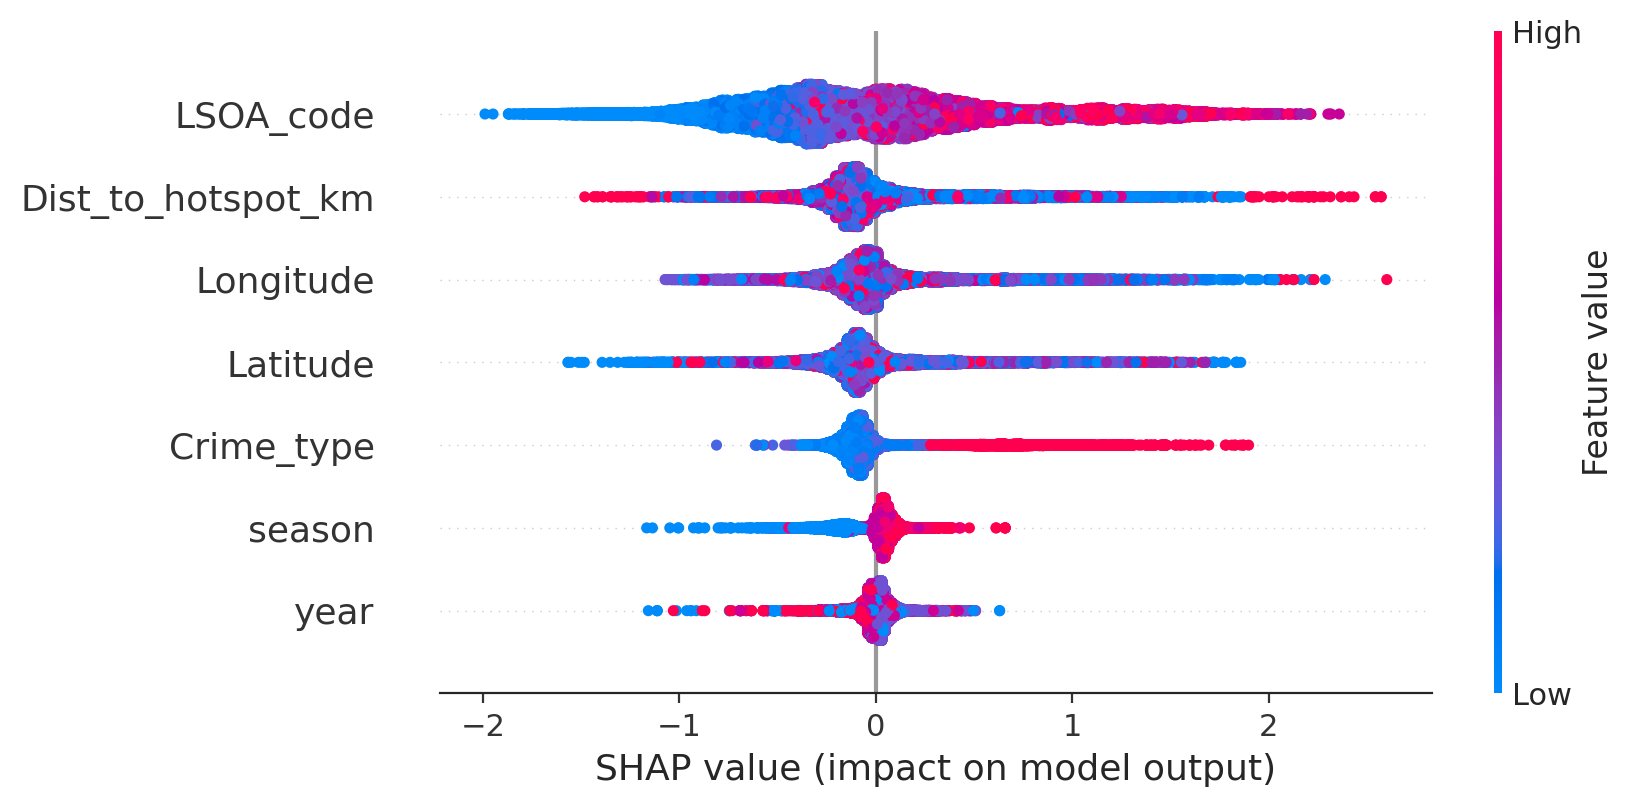

In [ ]:
# global explanation
shap.plots.beeswarm(shap_values_rfr)

In [ ]:
xgbr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['year', 'Latitude',
                                                   'Longitude',
                                                   'Dist_to_hotspot_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(handle_missing='return_nan'))]),
                                                  ['LSOA_code', 'Crime_type',
                                                   'season'])],...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [ ]:
xgbr.score(X_test, y_test)

0.8907578718093428

In [ ]:
xgbr.score(X_train, y_train)

0.9257648944720323

In [ ]:
cross_val_score(xgbr, X_train, y_train)

array([0.88442679, 0.88383658, 0.88553995, 0.88541453, 0.87959589])

In [ ]:
cross_val_score(xgbr, X_test, y_test)

array([0.81612748, 0.80305062, 0.81544514, 0.80961177, 0.80866185])

In [ ]:
mean_absolute_error(y_train, xgbr.predict(X_train))

0.30346675370419735

In [ ]:
mean_absolute_error(y_test, xgbr.predict(X_test))

0.35643796905925623

In [ ]:
cross_val_score(xgbr, X_train, y_train, scoring='neg_mean_absolute_error')

array([-0.36431474, -0.36564447, -0.36400519, -0.36139257, -0.36531559])

In [ ]:
cross_val_score(xgbr, X_test, y_test, scoring='neg_mean_absolute_error')

array([-0.44612392, -0.4645682 , -0.4544132 , -0.44989814, -0.45179189])

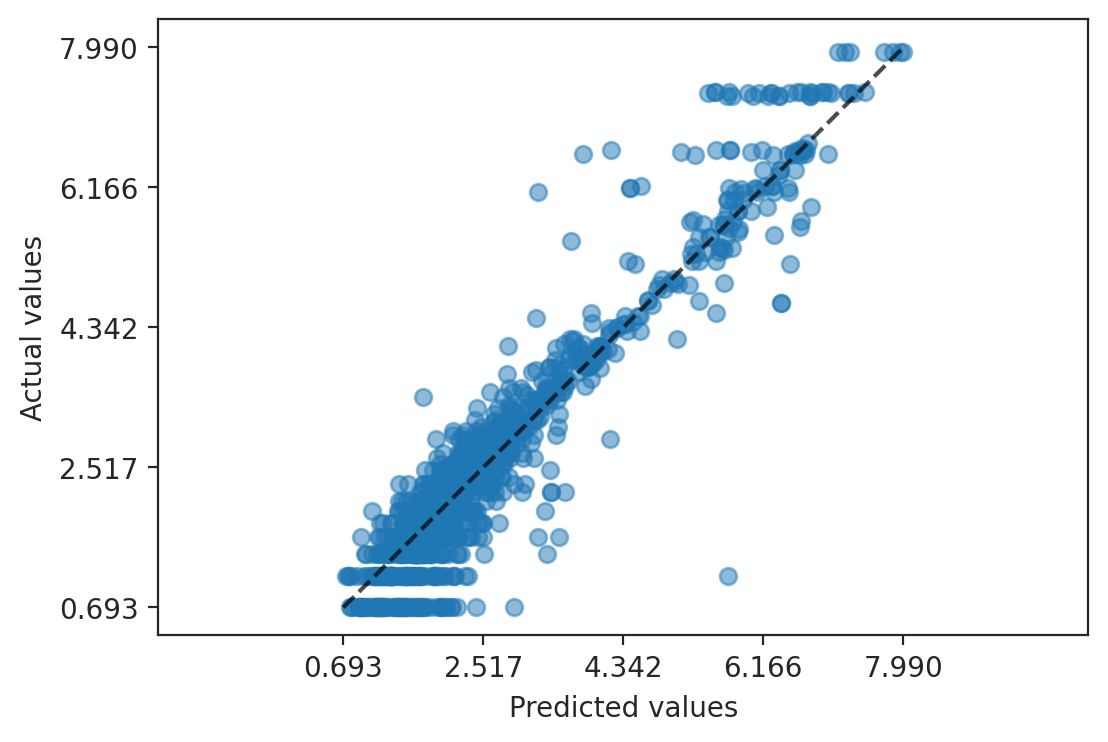

In [ ]:
PredictionErrorDisplay.from_estimator(
    xgbr, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

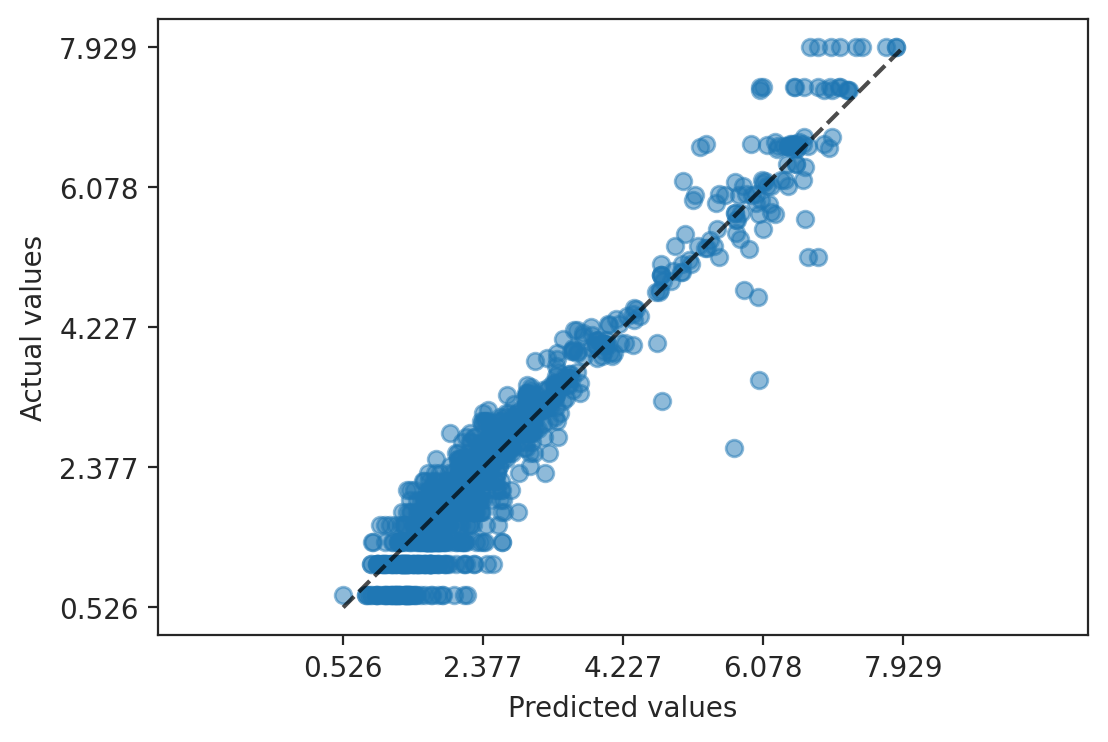

In [ ]:
PredictionErrorDisplay.from_estimator(
    xgbr, X_train, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
param_grid = {
    'est__max_depth': [10, 12, 14, 16, 18, 20]
}

In [ ]:
gs = GridSearchCV(xgbr, param_grid, return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
gs_results = gs.fit(X_train, y_train)

In [ ]:
gs_df = pd.DataFrame(gs_results.cv_results_)

In [ ]:
gs_df[['param_est__max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values('rank_test_score')

param_est__max_depth  mean_test_score  mean_train_score  rank_test_score
5                    20        -0.194280         -0.020324                1
4                    18        -0.199677         -0.030584                2
3                    16        -0.215344         -0.058168                3
2                    14        -0.245364         -0.111160                4
1                    12        -0.292948         -0.192438                5
0                    10        -0.364135         -0.298162                6

In [ ]:
X_train_pp = xgbr['pp'].transform(X_train)
column_names = X_train_pp.columns
X_test_pp  = xgbr['pp'].transform(X_test)

In [ ]:
explainer = shap.TreeExplainer(xgbr['est'], X_train_pp)

In [ ]:
shap_values_xgbr = explainer(X_test_pp, check_additivity=False)

100%|===================| 54181/54214 [10:43<00:00]       

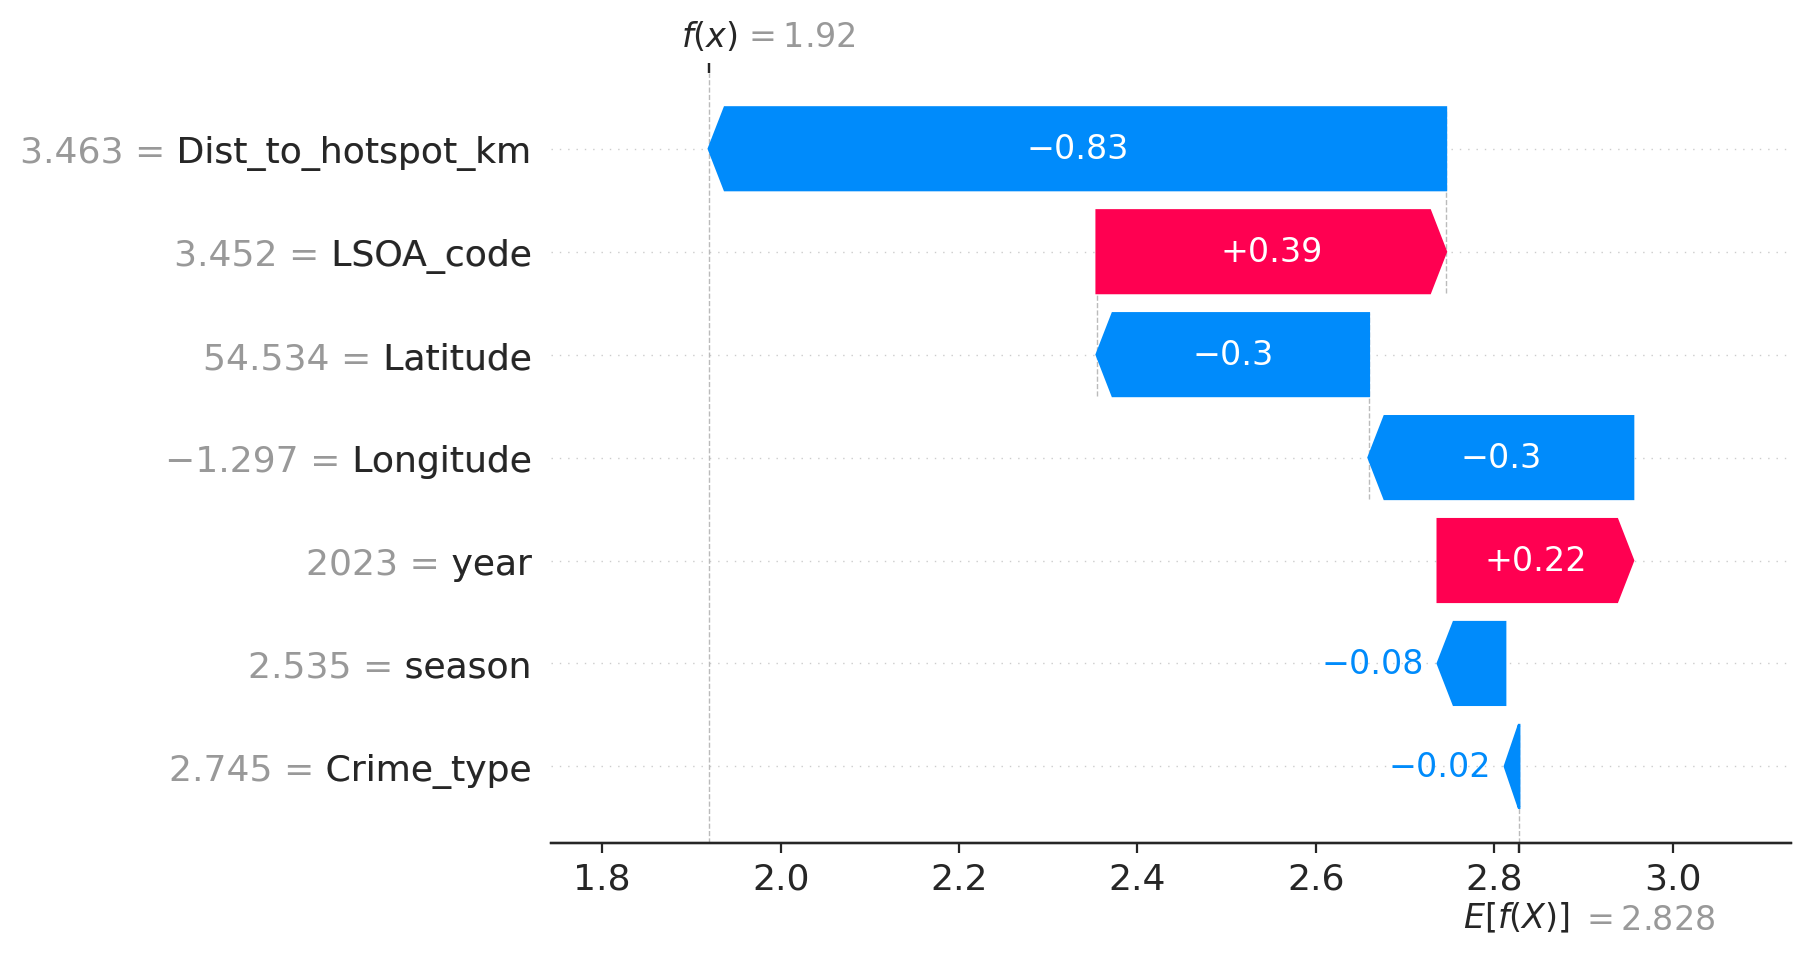

In [ ]:
shap.plots.waterfall(shap_values_xgbr[0])

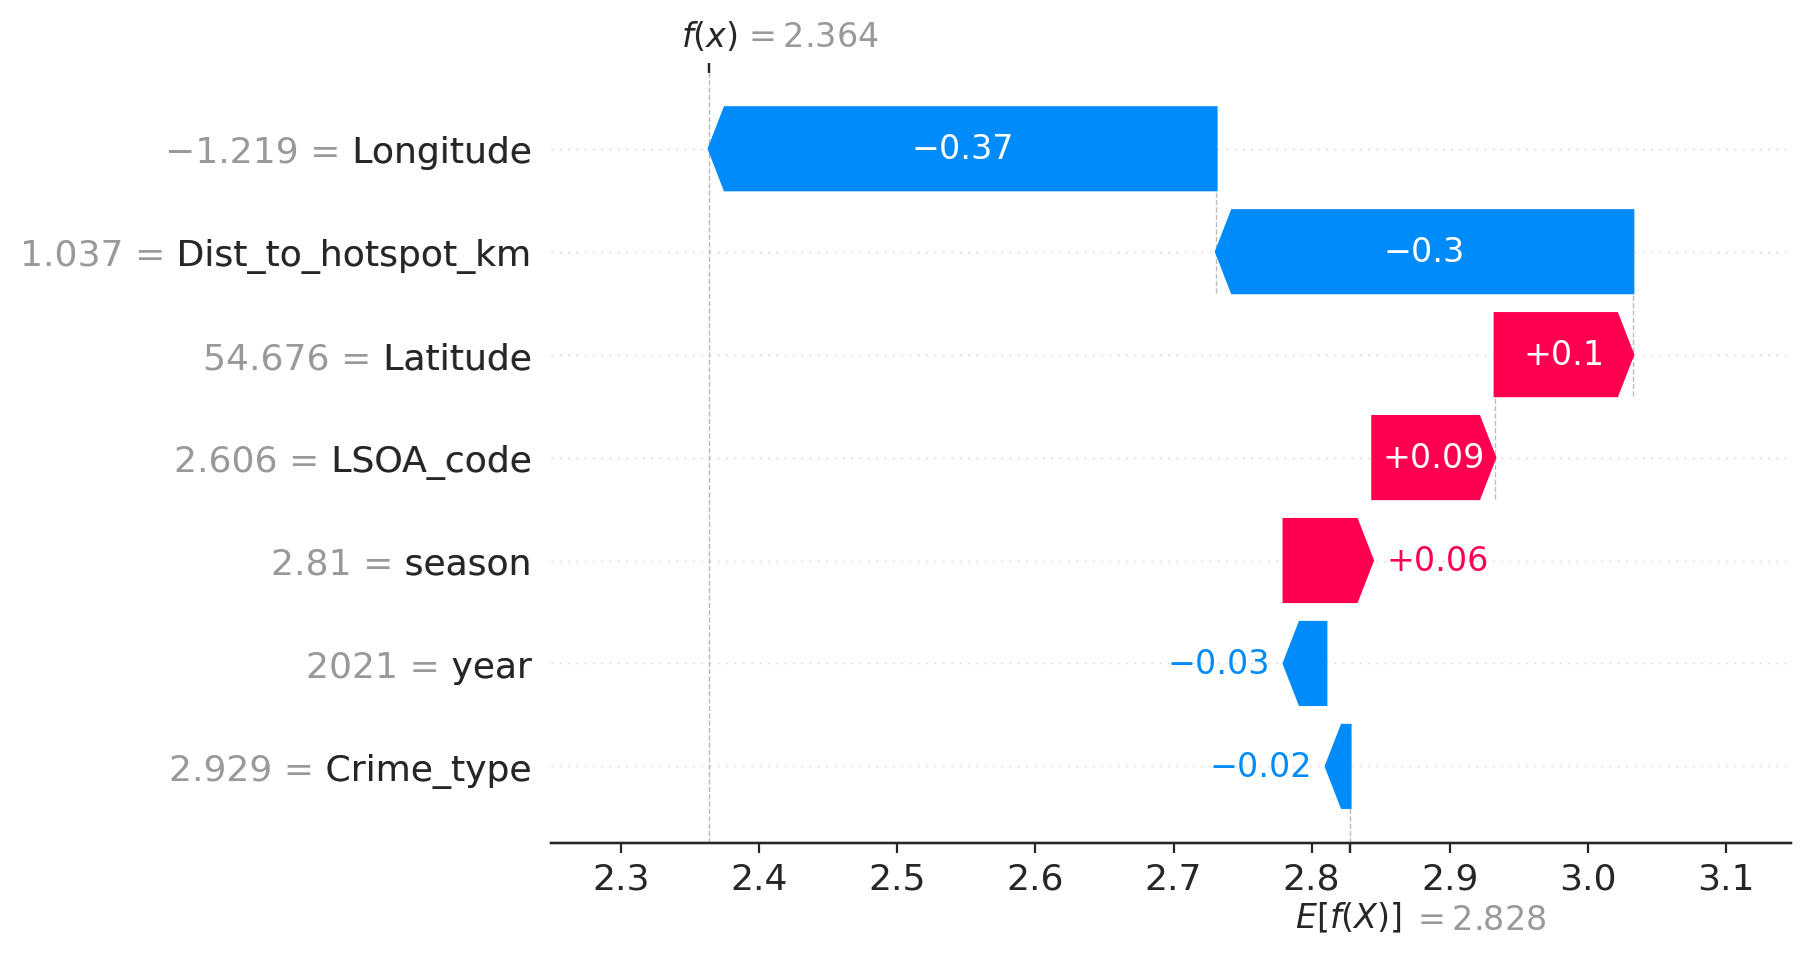

In [ ]:
shap.plots.waterfall(shap_values_xgbr[1])

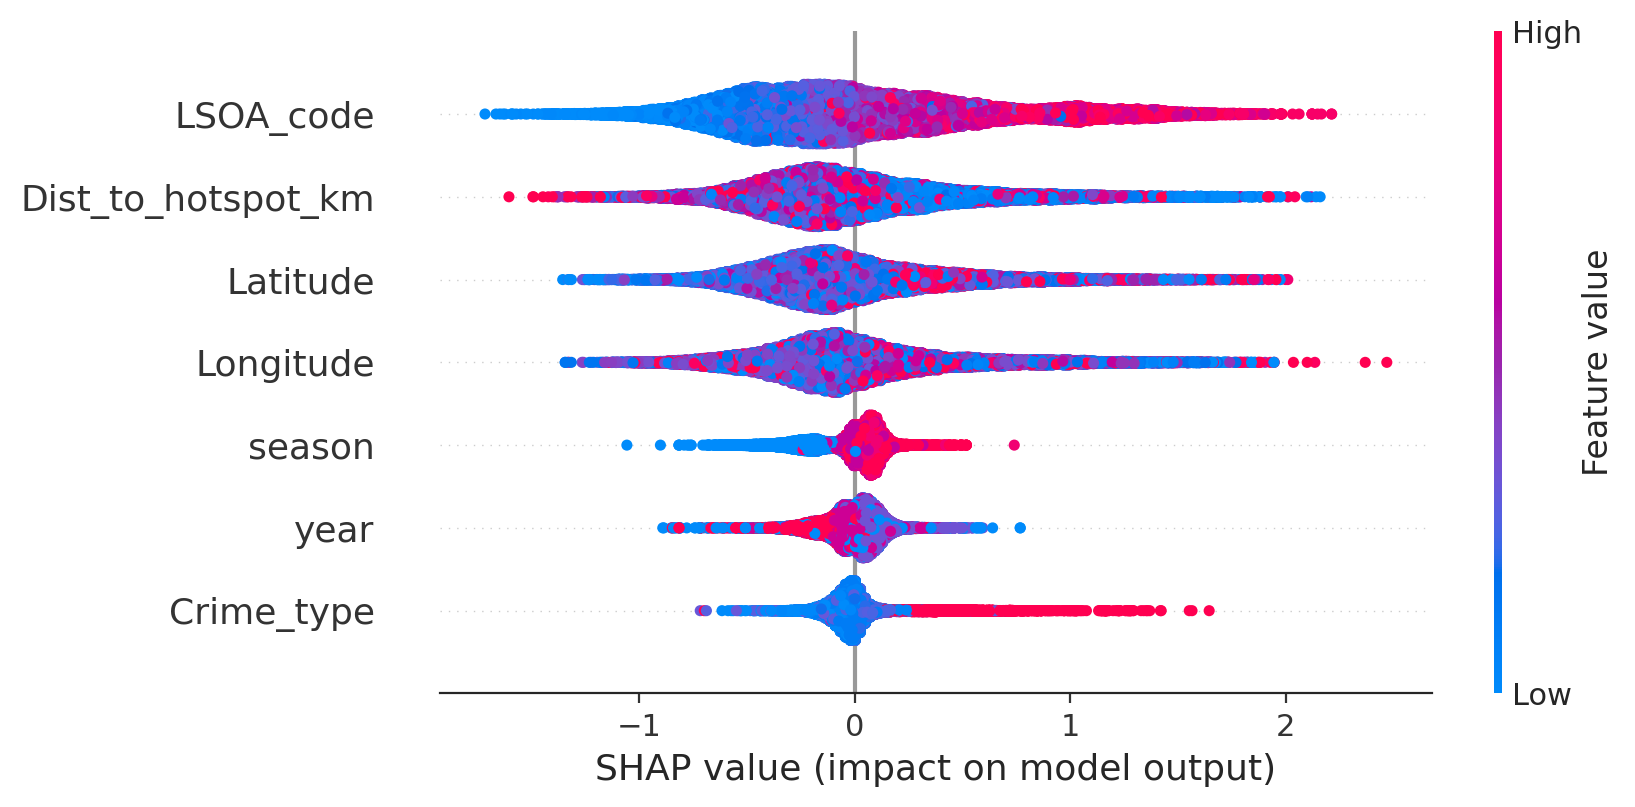

In [ ]:
shap.plots.beeswarm(shap_values_xgbr)

In [ ]:
dtr.fit(X_train, y_train)

Pipeline(steps=[('pp',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['year', 'Latitude',
                                                   'Longitude',
                                                   'Dist_to_hotspot_km']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('te',
                                                                   TargetEncoder(handle_missing='return_nan'))]),
                                                  ['LSOA_code', 'Crime_type',
                                                   'season'])],
                                   verbose_feature_names_out=False)),
                ('est', DecisionTreeRegressor(max_depth=18))])

In [ ]:
dtr.score(X_test, y_test)

0.775912912401214

In [ ]:
dtr.score(X_train, y_train)

0.8148401735246384

In [ ]:
cross_val_score(dtr, X_train, y_train)

array([0.76136212, 0.76738728, 0.76193446, 0.77589643, 0.74075555])

In [ ]:
cross_val_score(dtr, X_test, y_test)

array([0.63927984, 0.615049  , 0.64852166, 0.62502093, 0.62944938])

In [ ]:
mean_absolute_error(y_train, dtr.predict(X_train))

0.4204271143780753

In [ ]:
mean_absolute_error(y_test, dtr.predict(X_test))

0.4672669372535585

In [ ]:
cross_val_score(dtr, X_train, y_train, scoring='neg_mean_absolute_error')

array([-0.48081297, -0.47477253, -0.47908115, -0.46849424, -0.48939605])

In [ ]:
cross_val_score(dtr, X_test, y_test, scoring='neg_mean_absolute_error')

array([-0.56988202, -0.61196071, -0.58092749, -0.58867096, -0.5893794 ])

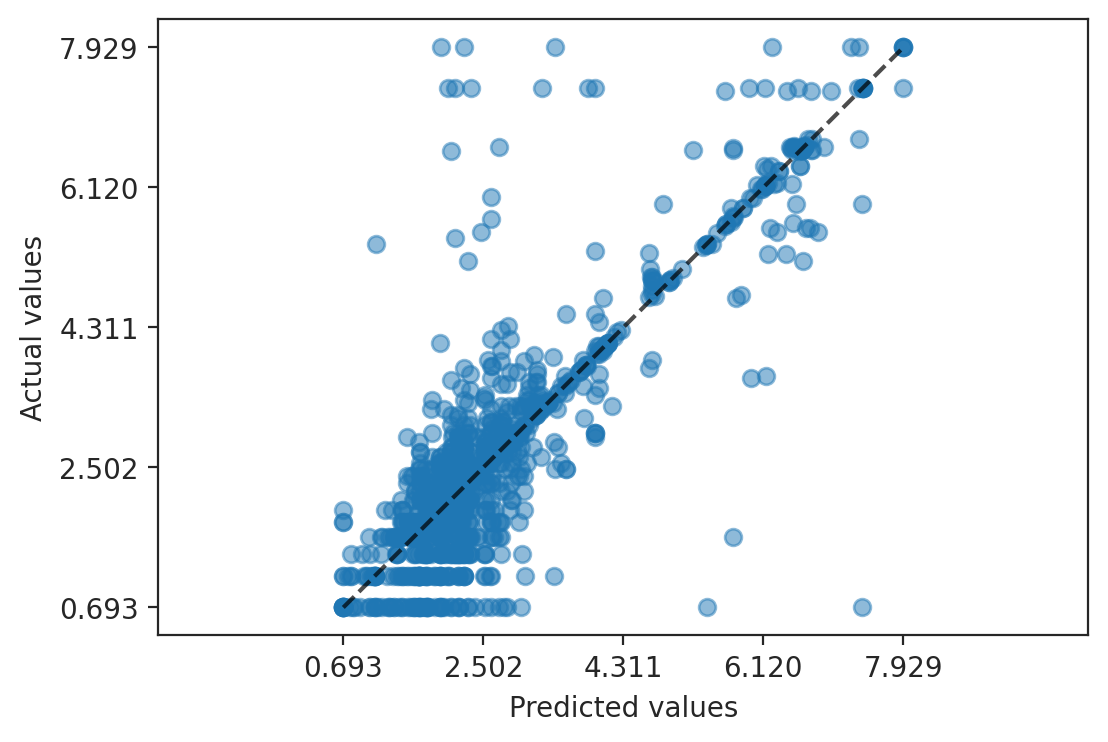

In [ ]:
PredictionErrorDisplay.from_estimator(
    dtr, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

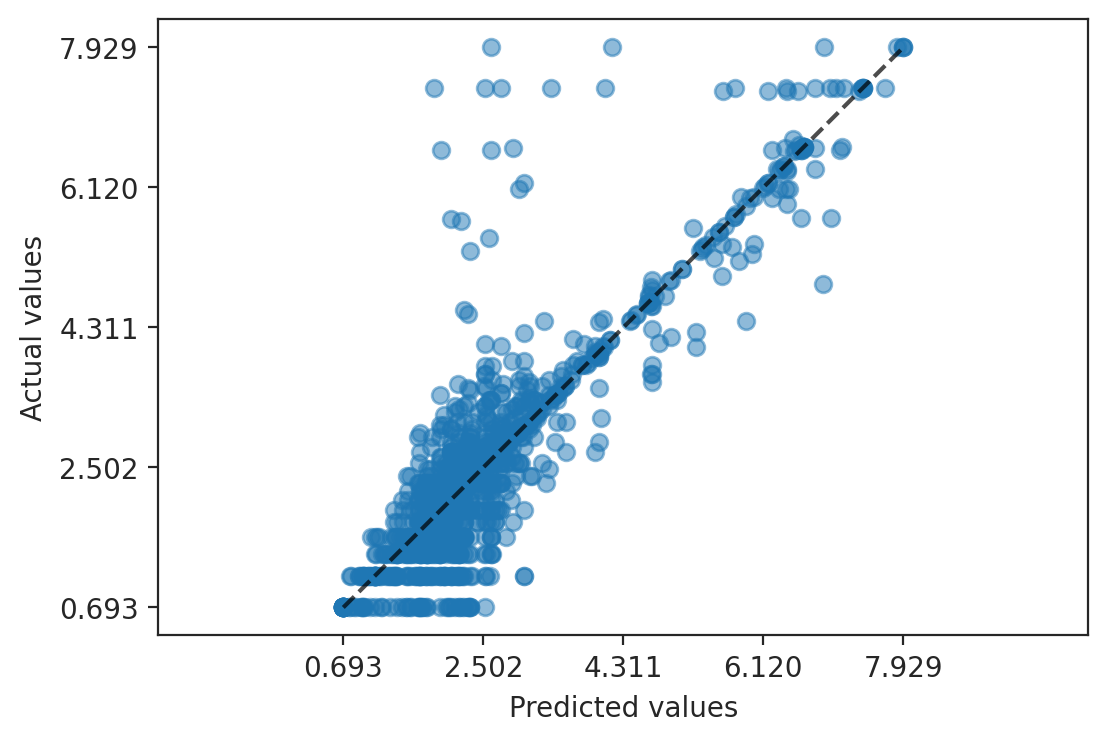

In [ ]:
PredictionErrorDisplay.from_estimator(
    dtr, X_train, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
param_grid = {
    'est__max_depth': [10, 12, 14, 16, 18, 20]
}

In [ ]:
gs = GridSearchCV(dtr, param_grid, return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
gs_results = gs.fit(X_train, y_train)

In [ ]:
gs_df = pd.DataFrame(gs_results.cv_results_)

In [ ]:
gs_df[['param_est__max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']].sort_values('rank_test_score')

param_est__max_depth  mean_test_score  mean_train_score  rank_test_score
5                    20        -0.417601         -0.338364                1
4                    18        -0.478670         -0.416445                2
3                    16        -0.545216         -0.501221                3
2                    14        -0.625282         -0.596037                4
1                    12        -0.707053         -0.691208                5
0                    10        -0.788492         -0.780351                6

In [ ]:
X_train_pp = dtr['pp'].transform(X_train)
column_names = X_train_pp.columns
X_test_pp  = dtr['pp'].transform(X_test)

In [ ]:
explainer = shap.TreeExplainer(dtr['est'], X_train_pp)

In [ ]:
shap_values_dtr = explainer(X_test_pp, check_additivity=False)

 97%|=================== | 52657/54214 [00:22<00:00]       

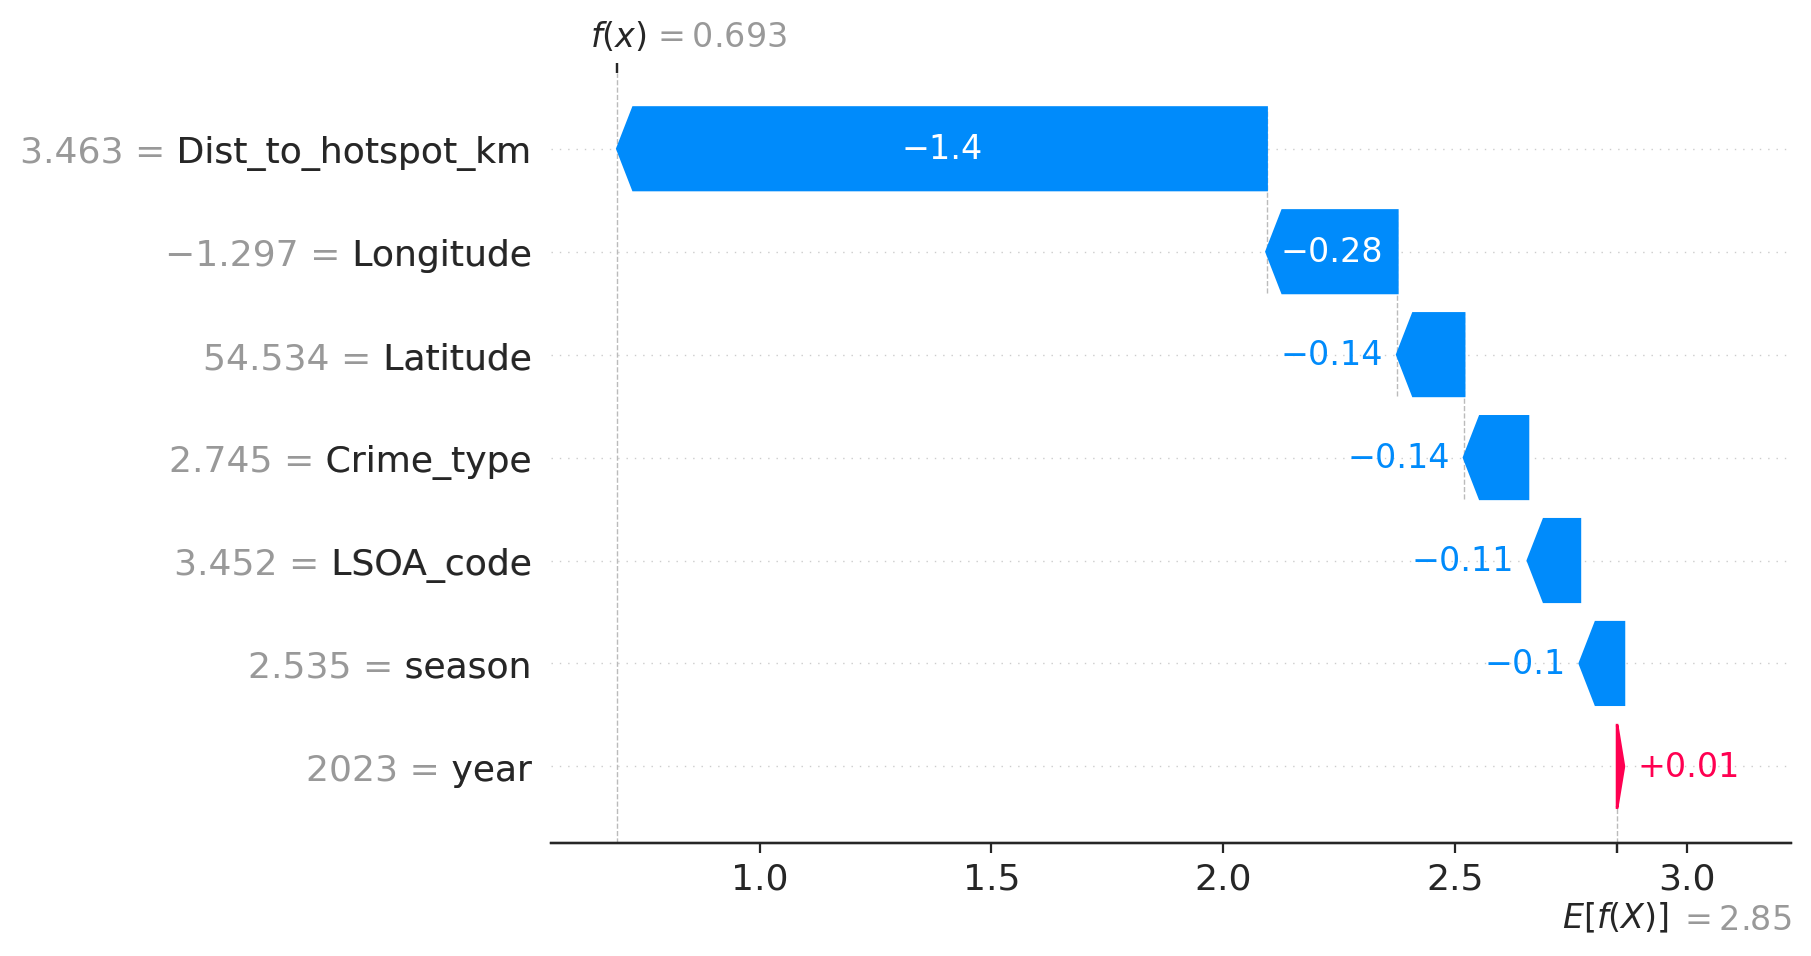

In [ ]:
shap.plots.waterfall(shap_values_dtr[0])

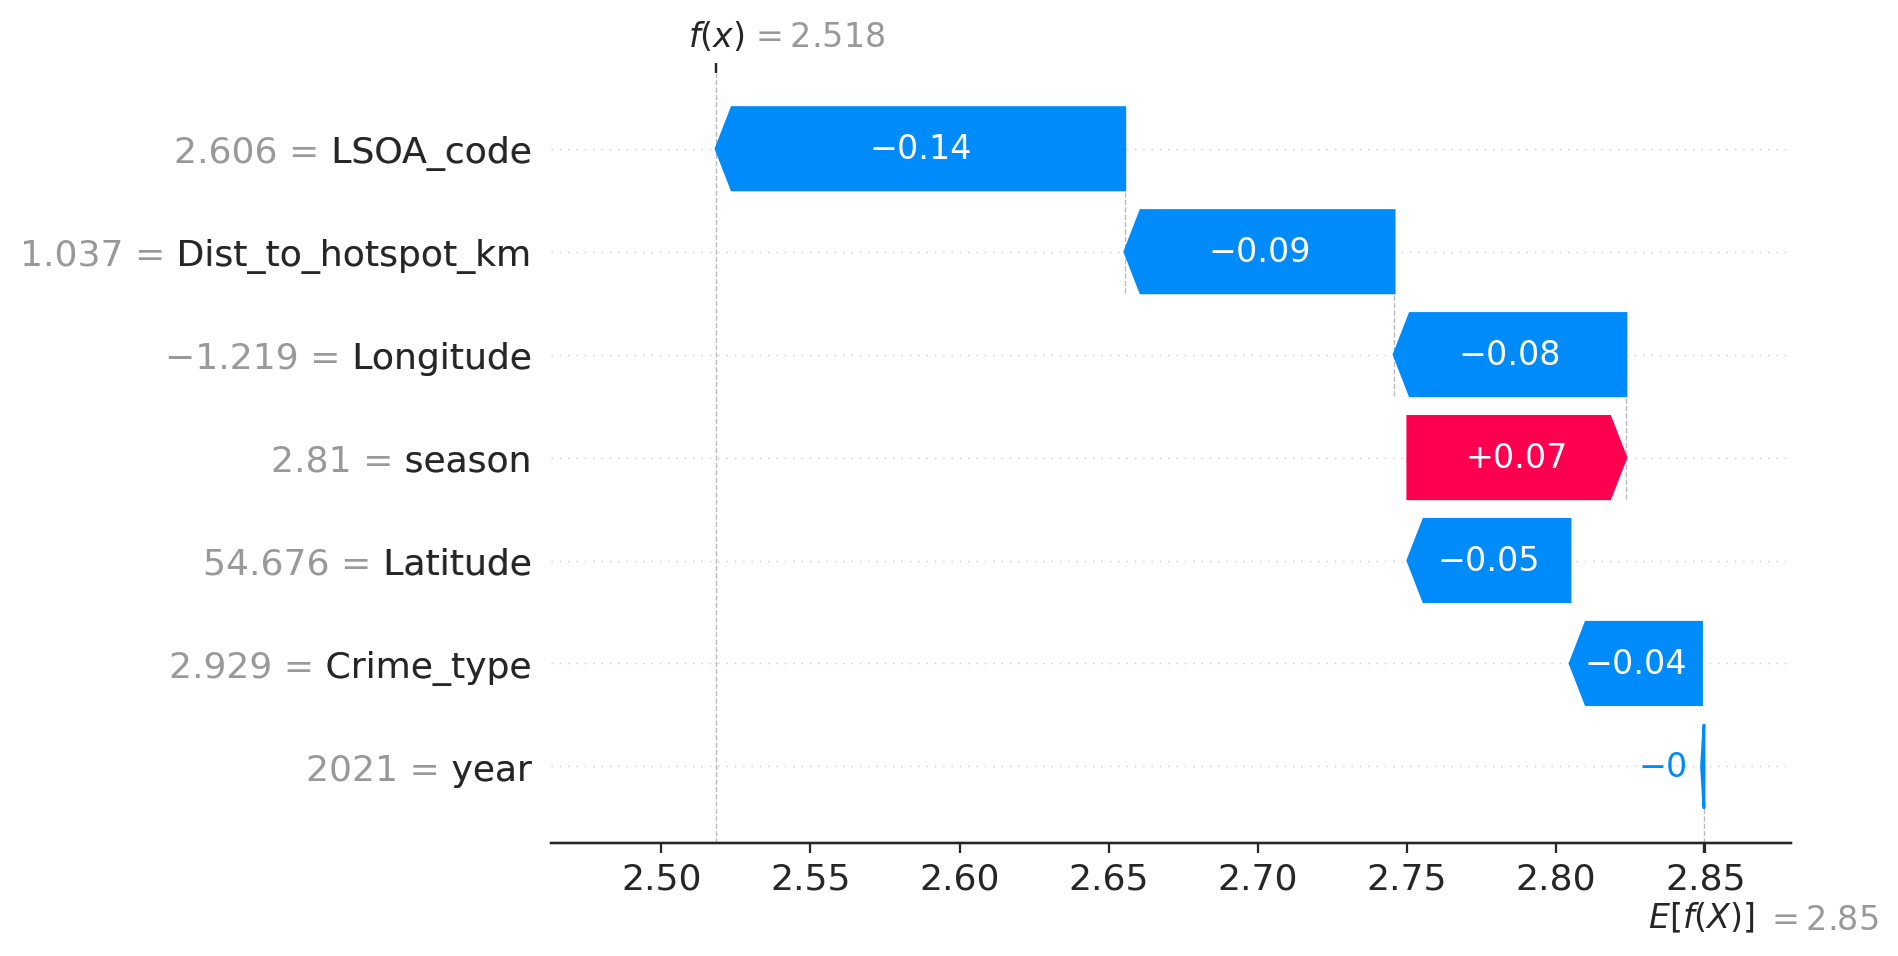

In [ ]:
shap.plots.waterfall(shap_values_dtr[1])

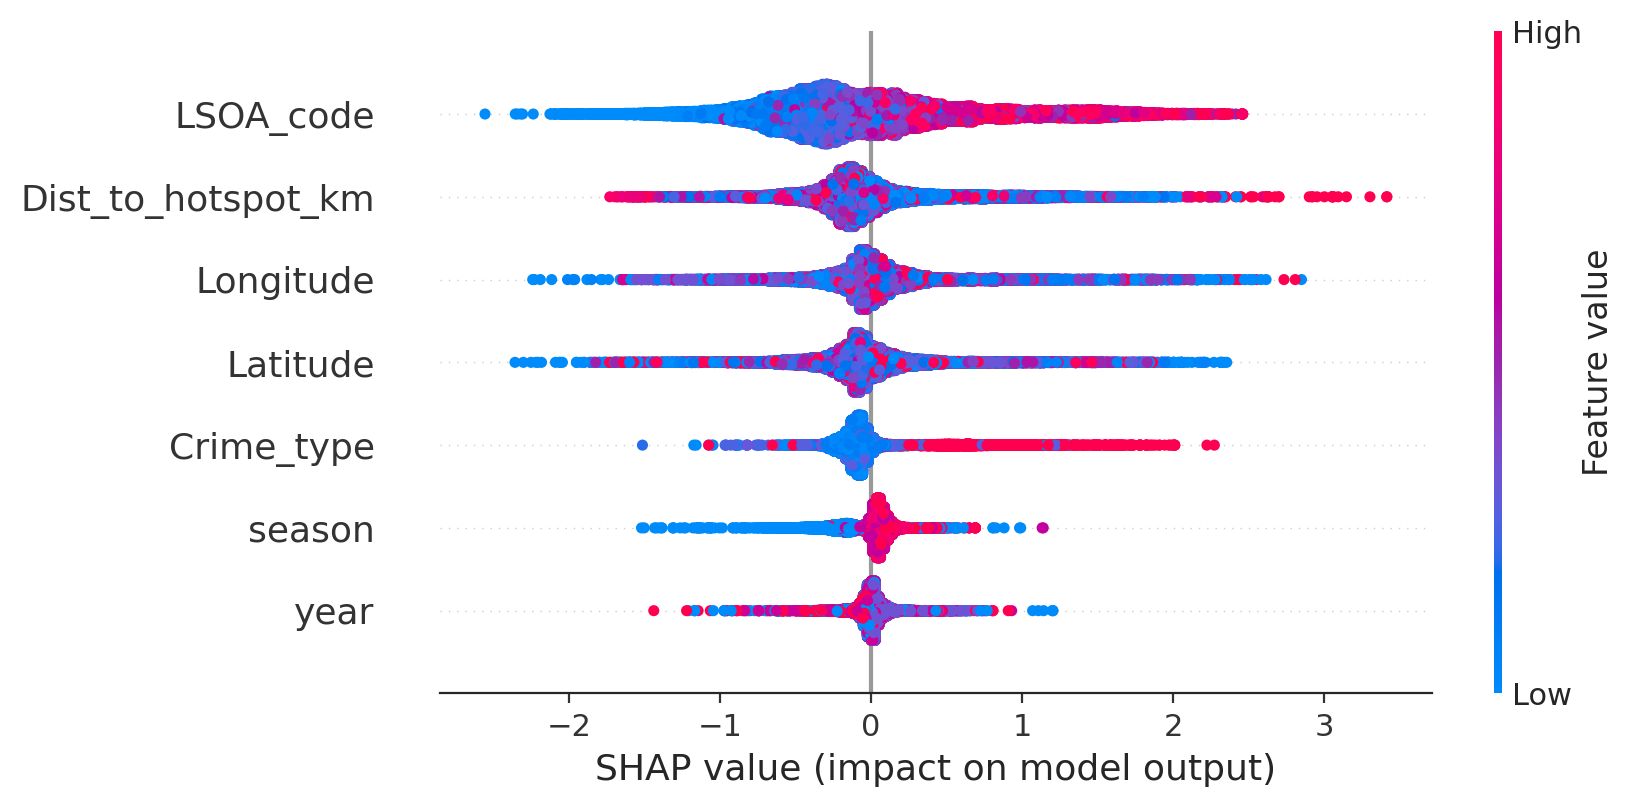

In [ ]:
shap.plots.beeswarm(shap_values_dtr)

In [ ]:
for est in my_models:
    est.fit(X_train, y_train)

In [ ]:
ensemble = VotingRegressor(
    [
        ("xgbr", xgbr),
        ('rfr', rfr),
        ('dtr', dtr)
    ]
)
ensemble.fit(X_train, y_train)

VotingRegressor(estimators=[('xgbr',
                             Pipeline(steps=[('pp',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['year',
                                                                                'Latitude',
                                                                                'Longitude',
                                                                                'Dist_to_hotspot_km']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('te',
                                                                                                TargetEncoder(handle_missing='return_nan'))]),
                                                                               ['...
                                                                transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['year',
                                                                                'Latitude',
                                                                                'Longitude',
                                                                                'Dist_to_hotspot_km']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('te',
                                                                                                TargetEncoder(handle_missing='return_nan'))]),
                                                                               ['LSOA_code',
                                                                                'Crime_type',
                                                                                'season'])],
                                                                verbose_feature_names_out=False)),
                                             ('est',
                                              DecisionTreeRegressor(max_depth=18))]))])

In [ ]:
ensemble.score(X_test, y_test)

0.8611641096698217

In [ ]:
ensemble.score(X_train, y_train)

0.8918612604769948

In [ ]:
cross_val_score(ensemble, X_train, y_train)

array([0.85432945, 0.85773596, 0.85545642, 0.85795711, 0.84465783])

In [ ]:
cross_val_score(ensemble, X_test, y_test)

array([0.78812929, 0.7647098 , 0.79455736, 0.77957939, 0.77245193])

In [ ]:
mean_absolute_error(y_train, ensemble.predict(X_train))

0.356190505276211

In [ ]:
mean_absolute_error(y_test, ensemble.predict(X_test))

0.3982203155610904

In [ ]:
cross_val_score(ensemble, X_train, y_train, scoring='neg_mean_absolute_error')

array([-0.40813807, -0.40323625, -0.40562631, -0.40171611, -0.4130425 ])

In [ ]:
cross_val_score(ensemble, X_test, y_test, scoring='neg_mean_absolute_error')

array([-0.47892251, -0.50807429, -0.48528588, -0.48602994, -0.49506937])

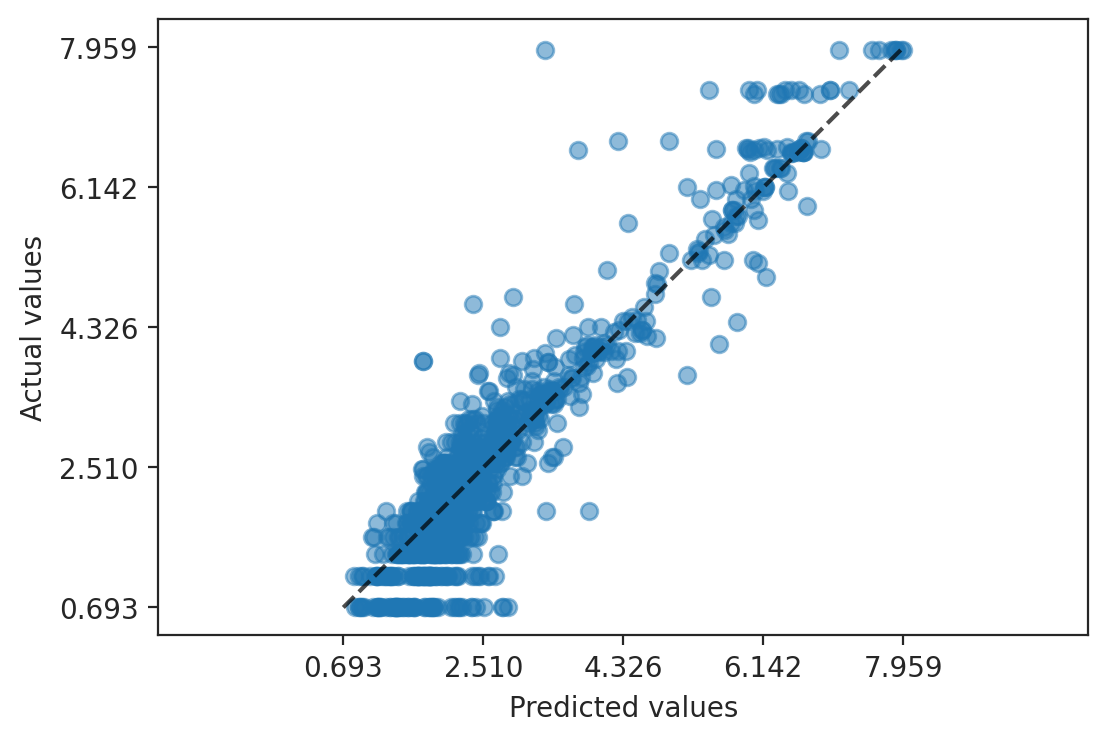

In [ ]:
PredictionErrorDisplay.from_estimator(
    ensemble, X_test, y_test, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

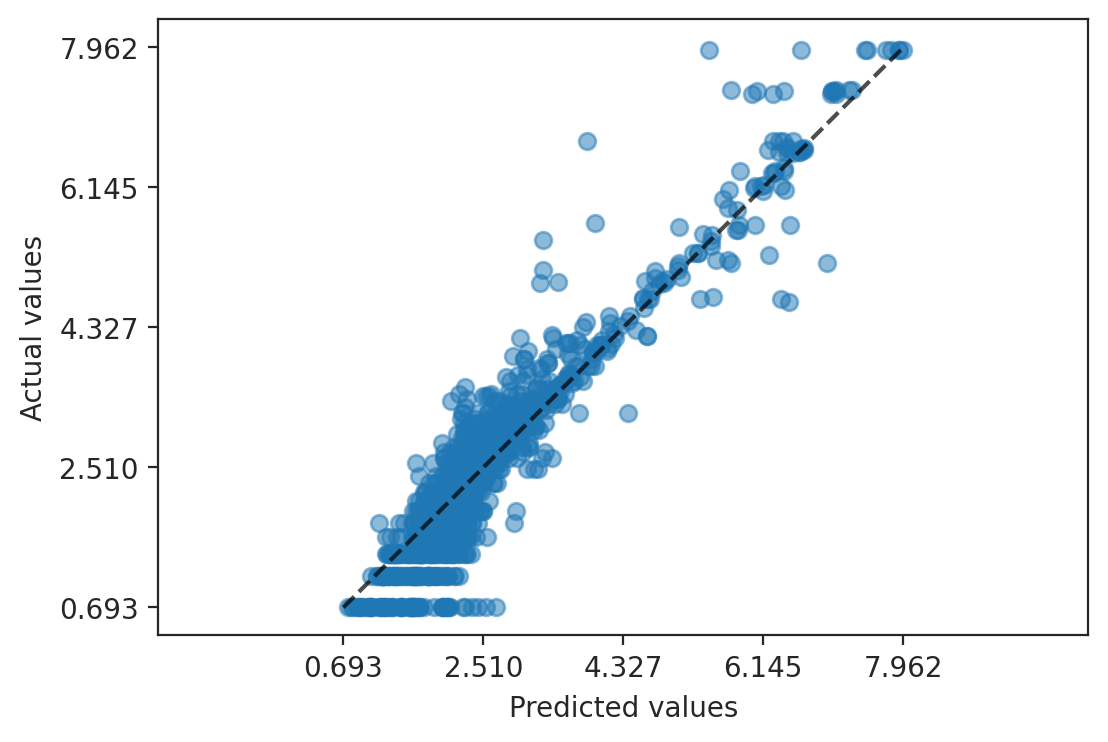

In [ ]:
PredictionErrorDisplay.from_estimator(
    ensemble, X_train, y_train, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
ensemble_shap_values = (shap_values_rfr + shap_values_xgbr + shap_values_dtr) / 3

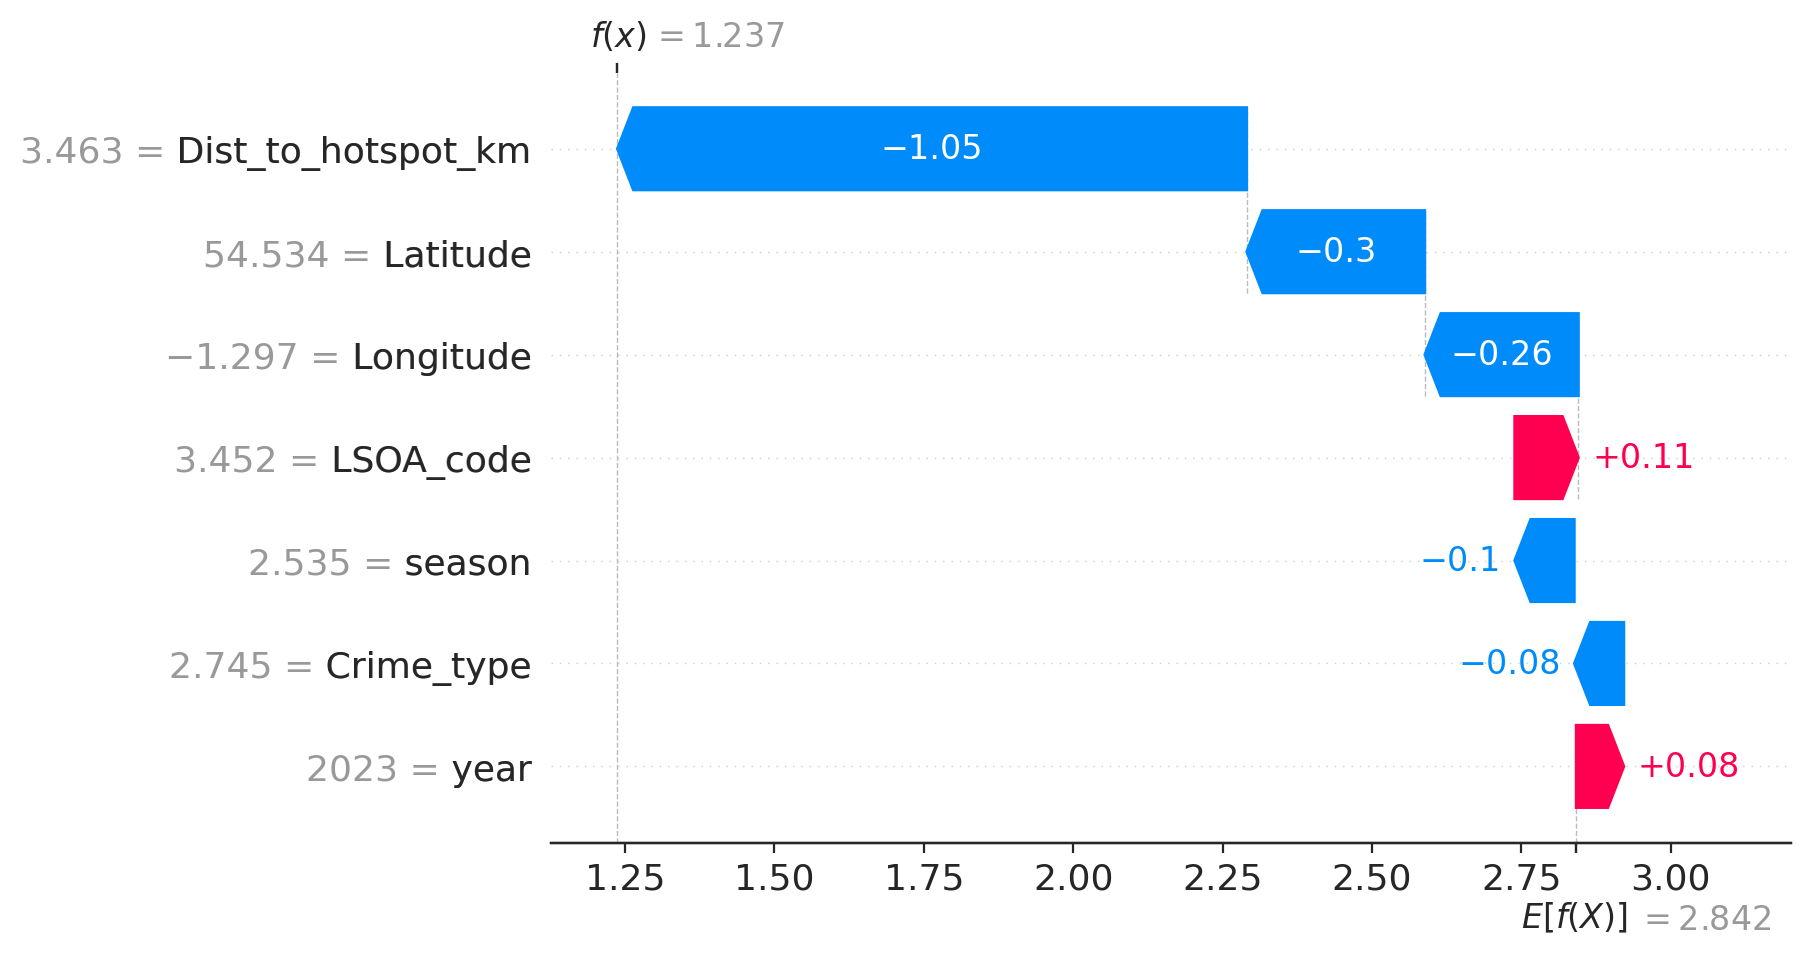

In [ ]:
shap.plots.waterfall(ensemble_shap_values[0])

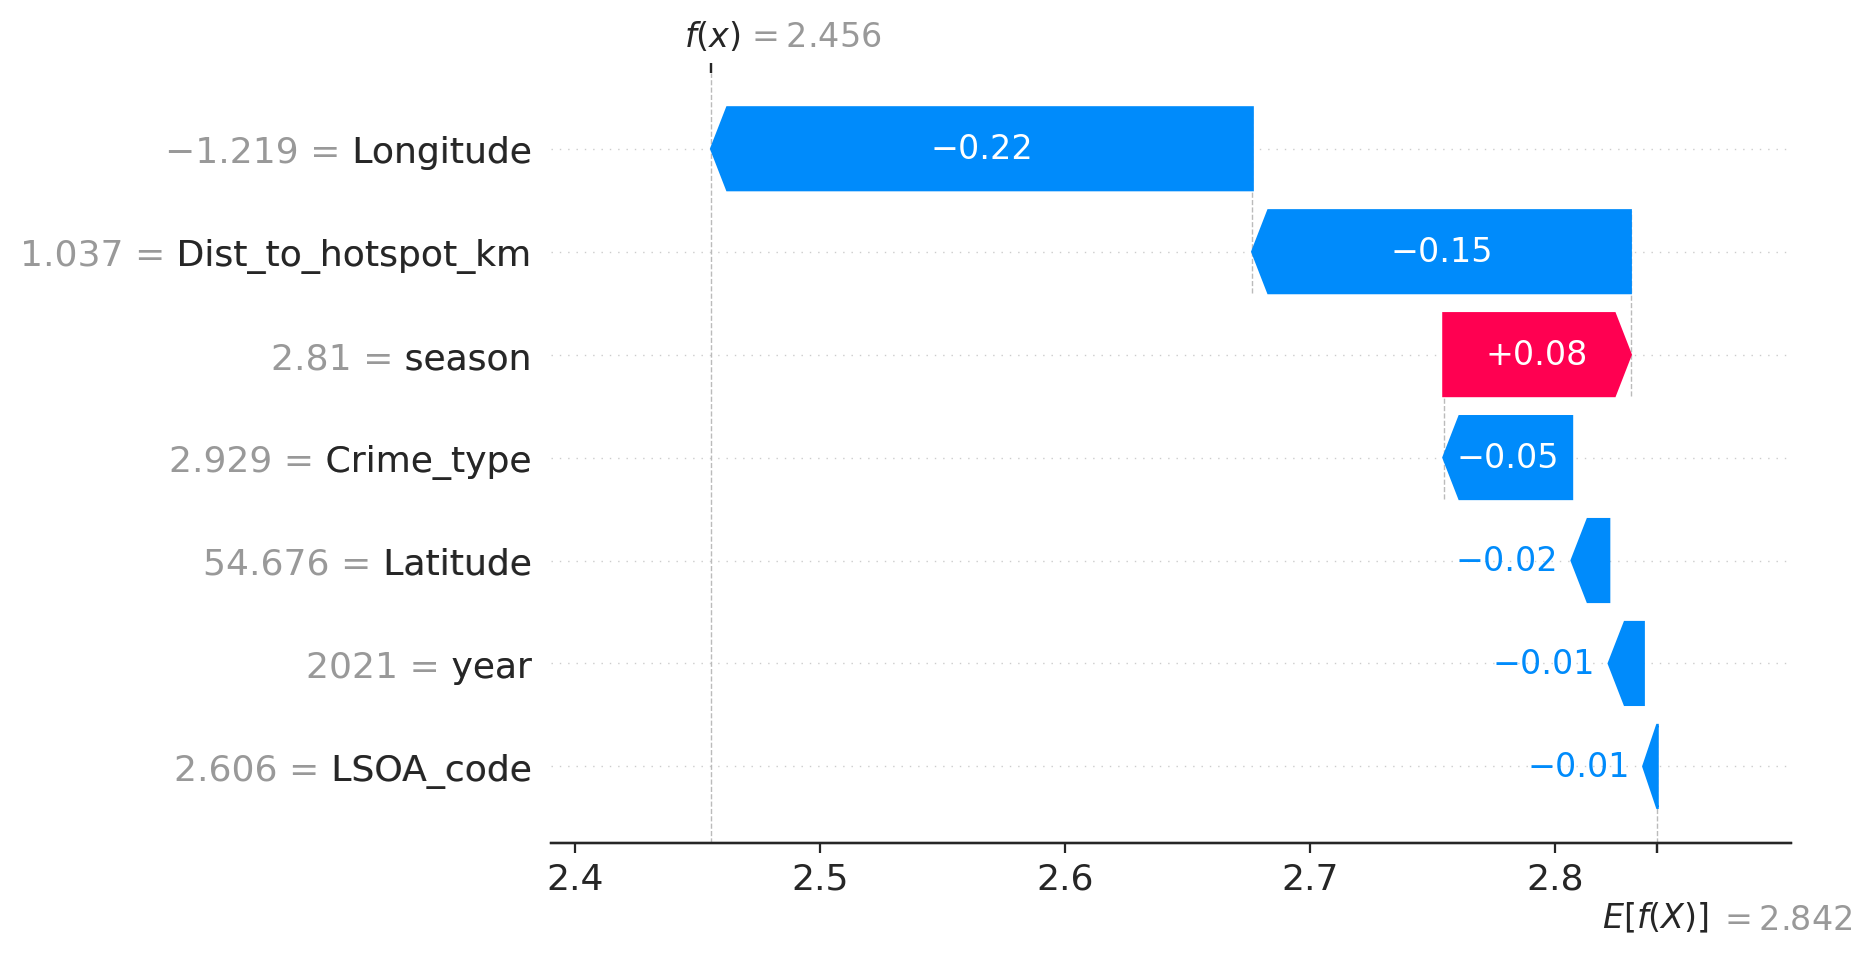

In [ ]:
shap.plots.waterfall(ensemble_shap_values[1])

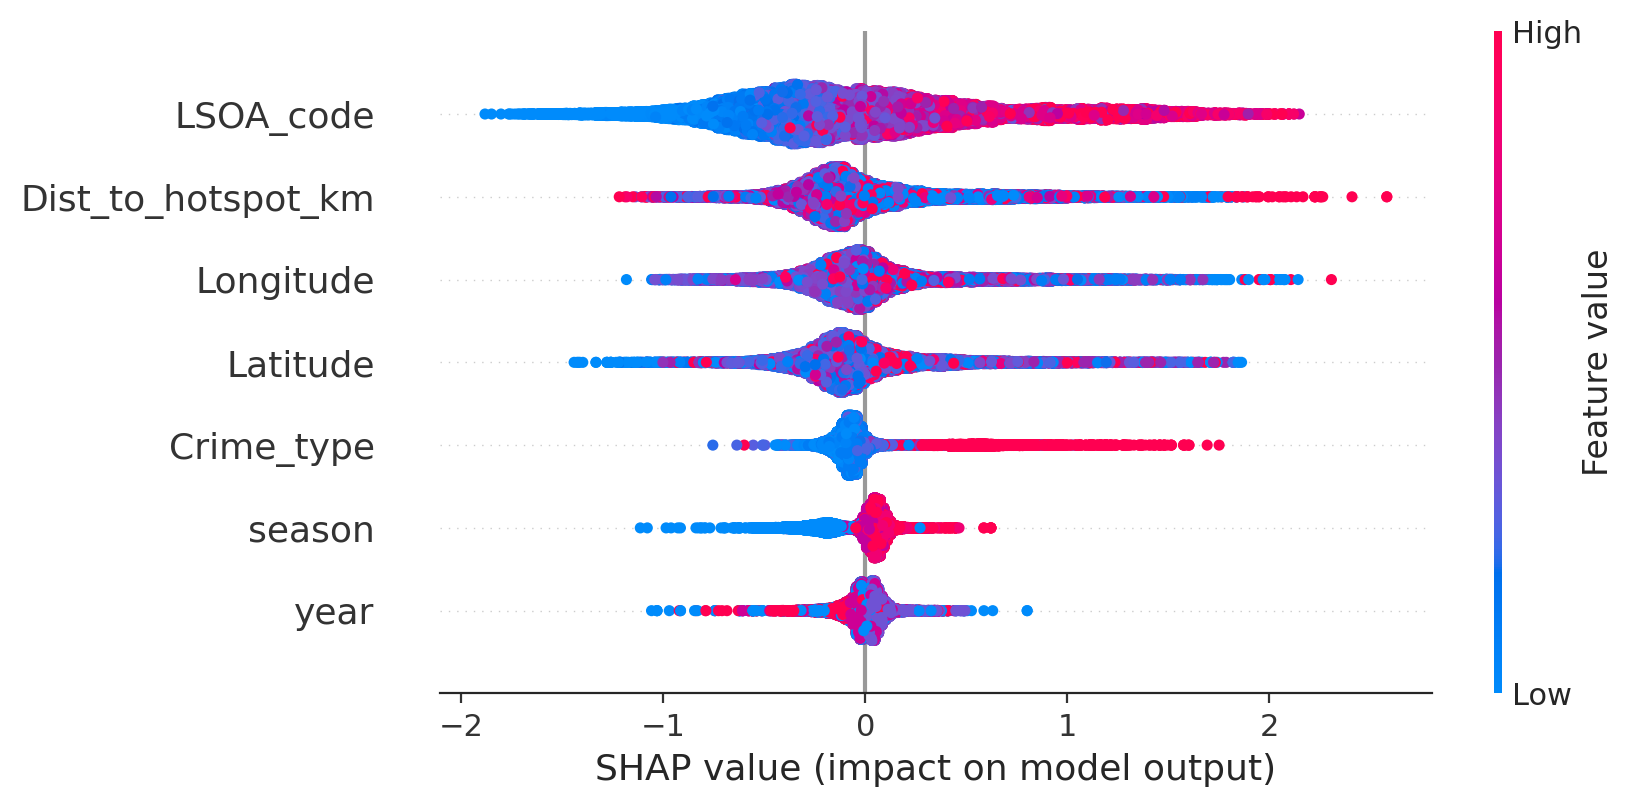

In [ ]:
shap.plots.beeswarm(ensemble_shap_values)